# Pyrates IA V3 - Analysis

# 1) Imports

In [45]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, kendalltau
from statsmodels.stats.multitest import multipletests

# 2)  Constants

### 2.1) Students constants

In [2]:
LAN_S3 = [
    {"game" : "HcN3TGD", "id" : 24, "group": "A"},
    {"game" : "NLTET8y", "id" : 25, "group": "A"},
    {"game" : "6xExMYw", "id" : 26, "group": "A"},
    {"game" : "E7vmemn", "id" : 27, "group": "A"},
    {"game" : "5eKc43c", "id" : 28, "group": "A"},
    {"game" : "DMTs6iy", "id" : 29, "group": "A"},
    {"game" : "eHuZtre", "id" : 30, "group": "A"},
    {"game" : "LahVD8s", "id" : 31, "group": "A"},
    {"game" : "EJSMbPz", "id" : 32, "group": "A"},
    {"game" : "BWgeNTq", "id" : 33, "group": "A"},
    {"game" : "g9AnsLe", "id" : 35, "group": "A"},
    {"game" : "Ee6est8", "id" : 36, "group": "A"},
    {"game" : "vEEvsMa", "id" : 37, "group": "A"},
    {"game" : "1c9tb2d", "id" : 38, "group": "A"},
    {"game" : "BSFagXS", "id" : 40, "group": "A"},
    {"game" : "HNJ75xA", "id" : 41, "group": "A"},
    {"game" : "md7tB97", "id" : 42, "group": "A"},
    {"game" : "NmHW4Ra", "id" : 43, "group": "A"},
    {"game" : "Mw8Es3C", "id" : 44, "group": "A"},
    {"game" : "GBLHCx9", "id" : 45, "group": "A"},
    {"game" : "GHbmTTg", "id" : 46, "group": "A"},
]
LAN_S8 = [
    {"game" : "KithBLH", "id" : 47, "group": "B"},
    {"game" : "YQhWN2z", "id" : 48, "group": "B"},
    {"game" : "yWr94BN", "id" : 49, "group": "B"},
    {"game" : "CCEnqrs", "id" : 50, "group": "B"},
    {"game" : "CQVmn1P", "id" : 51, "group": "B"},
    {"game" : "rEU8Tiq", "id" : 52, "group": "B"},
    {"game" : "kqQrtAk", "id" : 53, "group": "B"},
    {"game" : "nbfDnDS", "id" : 54, "group": "B"},
    {"game" : "fZPxgSi", "id" : 55, "group": "B"},
    {"game" : "ec7hfL8", "id" : 56, "group": "B"},
    {"game" : "jN7VfTE", "id" : 57, "group": "B"},
    {"game" : "WX54QGZ", "id" : 58, "group": "B"},
    {"game" : "FPu7xpq", "id" : 59, "group": "B"},
    {"game" : "MPXWevd", "id" : 60, "group": "B"},
    {"game" : "uDsYtAY", "id" : 61, "group": "B"},
    {"game" : "1PxBxAu", "id" : 62, "group": "B"},
    {"game" : "RC1k6P6", "id" : 63, "group": "B"},
    {"game" : "aCq8cYG", "id" : 64, "group": "B"},
    {"game" : "ZL2TGp4", "id" : 65, "group": "B"},
    {"game" : "5p4fx4Y", "id" : 66, "group": "B"},
    {"game" : "WNmm7gz", "id" : 67, "group": "B"},
    {"game" : "Tb7cjXu", "id" : 68, "group": "B"}
]
LAN_S10 = [
    {"game" : "mqDmUa3", "id" : 1, "group": "A"},
    {"game" : "GcmQWAa", "id" : 2, "group": "A"},
    {"game" : "8hYqYSG", "id" : 3, "group": "A"},
    {"game" : "XdF2sz6", "id" : 4, "group": "A"},
    {"game" : "Rj6mATf", "id" : 5, "group": "A"},
    {"game" : "nddvPEB", "id" : 6, "group": "A"},
    {"game" : "rtaygH1", "id" : 7, "group": "A"},
    {"game" : "7LRuReQ", "id" : 8, "group": "A"},
    {"game" : "Q3kVGXG", "id" : 9, "group": "A"},
    {"game" : "BxHq3Cn", "id" : 10, "group": "A"},
    {"game" : "Y18BWBS", "id" : 11, "group": "A"},
    {"game" : "8uynbDg", "id" : 12, "group": "A"},
    {"game" : "XPnMMcz", "id" : 13, "group": "B"},
    {"game" : "MtmK4TN", "id" : 14, "group": "B"},
    {"game" : "uXCjh6E", "id" : 15, "group": "B"},
    {"game" : "BmfYK7Q", "id" : 16, "group": "B"},
    {"game" : "JEH4PPH", "id" : 17, "group": "B"},
    {"game" : "kitHifp", "id" : 18, "group": "B"},
    {"game" : "7bfEHcG", "id" : 19, "group": "B"},
    {"game" : "GWDnaUv", "id" : 20, "group": "B"},
    {"game" : "dFjxgLF", "id" : 21, "group": "B"},
    {"game" : "smeJddf", "id" : 22, "group": "B"},
    {"game" : "NNAFyqZ", "id" : 23, "group": "B"},
]

LAN_S10A = [
    {"game" : "mqDmUa3", "id" : 1, "group": "A"},
    {"game" : "GcmQWAa", "id" : 2, "group": "A"},
    {"game" : "8hYqYSG", "id" : 3, "group": "A"},
    {"game" : "XdF2sz6", "id" : 4, "group": "A"},
    {"game" : "Rj6mATf", "id" : 5, "group": "A"},
    {"game" : "nddvPEB", "id" : 6, "group": "A"},
    {"game" : "rtaygH1", "id" : 7, "group": "A"},
    {"game" : "7LRuReQ", "id" : 8, "group": "A"},
    {"game" : "Q3kVGXG", "id" : 9, "group": "A"},
    {"game" : "BxHq3Cn", "id" : 10, "group": "A"},
    {"game" : "Y18BWBS", "id" : 11, "group": "A"},
    {"game" : "8uynbDg", "id" : 12, "group": "A"}
]

LAN_S10B = [
    {"game" : "XPnMMcz", "id" : 13, "group": "B"},
    {"game" : "MtmK4TN", "id" : 14, "group": "B"},
    {"game" : "uXCjh6E", "id" : 15, "group": "B"},
    {"game" : "BmfYK7Q", "id" : 16, "group": "B"},
    {"game" : "JEH4PPH", "id" : 17, "group": "B"},
    {"game" : "kitHifp", "id" : 18, "group": "B"},
    {"game" : "7bfEHcG", "id" : 19, "group": "B"},
    {"game" : "GWDnaUv", "id" : 20, "group": "B"},
    {"game" : "dFjxgLF", "id" : 21, "group": "B"},
    {"game" : "smeJddf", "id" : 22, "group": "B"},
    {"game" : "NNAFyqZ", "id" : 23, "group": "B"}
]

CER_B = [
    {"game" : "hSEpfh6", "id" : 70, "group": "B"},
    {"game" : "V8JfhDC", "id" : 71, "group": "B"},
    {"game" : "qrCPbQ1", "id" : 72, "group": "B"},
    {"game" : "sRjKkFR", "id" : 73, "group": "B"},
    {"game" : "e3fX5zy", "id" : 74, "group": "B"},
    {"game" : "4DmPYa8", "id" : 75, "group": "B"},
    {"game" : "QW9ffKD", "id" : 76, "group": "B"},
    {"game" : "uzasR9C", "id" : 77, "group": "B"},
    {"game" : "Hj1hj2x", "id" : 78, "group": "B"},
    {"game" : "PzEgnMQ", "id" : 79, "group": "B"},
    {"game" : "CVXyicN", "id" : 80, "group": "B"},
    {"game" : "nTVuGHu", "id" : 81, "group": "B"},
    {"game" : "s3MLpCY", "id" : 82, "group": "B"},
    {"game" : "aNNf7qf", "id" : 83, "group": "B"},
    {"game" : "cGLSg1w", "id" : 84, "group": "B"},
    {"game" : "KcmWuD1", "id" : 85, "group": "B"},
    {"game" : "UXhp1pQ", "id" : 86, "group": "B"},
    {"game" : "7sFNVyY", "id" : 87, "group": "B"},
    {"game" : "8fTV5e4", "id" : 88, "group": "B"},
    {"game" : "RA5j1aa", "id" : 89, "group": "B"},
    {"game" : "YedyVtJ", "id" : 90, "group": "B"},
    {"game" : "h3DQz8V", "id" : 91, "group": "B"},
    {"game" : "gCmRipu", "id" : 92, "group": "B"},
    {"game" : "r2nRqua", "id" : 93, "group": "B"},
    {"game" : "ddBigSf", "id" : 94, "group": "B"},
    {"game" : "RwVLpX5", "id" : 95, "group": "B"},
    {"game" : "UJwQ5hj", "id" : 96, "group": "B"},
    {"game" : "7uJU4rM", "id" : 97, "group": "B"},
    {"game" : "P7pJMNq", "id" : 98, "group": "B"},
    {"game" : "6bpQ2fm", "id" : 99, "group": "B"},
    {"game" : "NrTDfqP", "id" : 100, "group": "B"},
    {"game" : "3jWkuh7", "id" : 101, "group": "B"},
    {"game" : "ii8BMw9", "id" : 102, "group": "B"},
    {"game" : "xHPZqJZ", "id" : 103, "group": "B"},
    {"game" : "83p5bBi", "id" : 104, "group": "B"},
    {"game" : "1Pz9pBs", "id" : 105, "group": "B"},
    {"game" : "rFftXhm", "id" : 106, "group": "B"},
    {"game" : "S636Ykg", "id" : 107, "group": "B"},
    {"game" : "3ADHfTr", "id" : 108, "group": "B"},
    {"game" : "tPmQvJ6", "id" : 109, "group": "B"},
    {"game" : "1weJ1ai", "id" : 110, "group": "B"},
    {"game" : "ysNQLAT", "id" : 111, "group": "B"},
    {"game" : "Jk4dMug", "id" : 112, "group": "B"},
    {"game" : "FHFjBe1", "id" : 113, "group": "B"},
    {"game" : "8WaePVH", "id" : 114, "group": "B"},
    {"game" : "8tkqFp5", "id" : 115, "group": "B"},
    {"game" : "AzwEQSK", "id" : 116, "group": "B"},
    {"game" : "FHKunpa", "id" : 117, "group": "B"},
    {"game" : "BYRG22u", "id" : 118, "group": "B"},
    {"game" : "15a3BZ5", "id" : 119, "group": "B"},
    {"game" : "VqRuHqD", "id" : 120, "group": "B"},
    {"game" : "f1NCHaR", "id" : 121, "group": "B"},
    {"game" : "UdPzfmq", "id" : 122, "group": "B"},
    {"game" : "GxrPB13", "id" : 123, "group": "B"},
    {"game" : "SbwFnJX", "id" : 124, "group": "B"},
    {"game" : "GeprQNf", "id" : 125, "group": "B"},
    {"game" : "7HMADNy", "id" : 126, "group": "B"},
    {"game" : "8V6hAhH", "id" : 127, "group": "B"},
    {"game" : "fj79xTj", "id" : 128, "group": "B"},
    {"game" : "ij6sUBR", "id" : 129, "group": "B"},
    {"game" : "9LBpMMj", "id" : 130, "group": "B"},
    {"game" : "tQ3x7tH", "id" : 131, "group": "B"},
    {"game" : "yP2Bakh", "id" : 132, "group": "B"},
    {"game" : "k1C788i", "id" : 133, "group": "B"},
    {"game" : "wYBcuHw", "id" : 134, "group": "B"},
    {"game" : "P5sGhDi", "id" : 135, "group": "B"},
    {"game" : "BVX7YSP", "id" : 136, "group": "B"},
    {"game" : "SM4iA6T", "id" : 137, "group": "B"},
]

CER_A = [
    {"game" : "Zp5DN9E", "id" : 138, "group": "A"},
    {"game" : "bdMCaSs", "id" : 139, "group": "A"},
    {"game" : "Mei7hqy", "id" : 140, "group": "A"},
    {"game" : "BYJvbXV", "id" : 141, "group": "A"},
    {"game" : "5GhAmwR", "id" : 142, "group": "A"},
    {"game" : "nt4EC9b", "id" : 143, "group": "A"},
    {"game" : "qfQUQ2x", "id" : 144, "group": "A"},
    {"game" : "8WFnTds", "id" : 145, "group": "A"},
    {"game" : "2SEMvYB", "id" : 146, "group": "A"},
    {"game" : "R1rDmDy", "id" : 147, "group": "A"},
    {"game" : "p5yq6TV", "id" : 148, "group": "A"},
    {"game" : "CEq6Scv", "id" : 149, "group": "A"},
    {"game" : "q7RqbZu", "id" : 150, "group": "A"},
    {"game" : "zr2EQTj", "id" : 151, "group": "A"},
    {"game" : "ZdpLcBU", "id" : 152, "group": "A"},
    {"game" : "S8qUtcV", "id" : 153, "group": "A"},
    {"game" : "SizqTY2", "id" : 154, "group": "A"},
    {"game" : "GwjYHkQ", "id" : 155, "group": "A"},
    {"game" : "dKiE4sv", "id" : 156, "group": "A"},
    {"game" : "Yu55f3v", "id" : 157, "group": "A"},
    {"game" : "4aXsn9D", "id" : 158, "group": "A"},
    {"game" : "Mz534z4", "id" : 159, "group": "A"},
    {"game" : "Dq9RKp5", "id" : 160, "group": "A"},
    {"game" : "wGUGfck", "id" : 161, "group": "A"},
    {"game" : "BwnQBA3", "id" : 162, "group": "A"},
    {"game" : "x8GeBCs", "id" : 163, "group": "A"},
    {"game" : "AfjMY7h", "id" : 164, "group": "A"},
    {"game" : "6JGAeK8", "id" : 165, "group": "A"},
    {"game" : "99fMXPV", "id" : 166, "group": "A"},
    {"game" : "SpGsjpW", "id" : 167, "group": "A"},
    {"game" : "u3QiumR", "id" : 168, "group": "A"},
    {"game" : "SDwF1Aw", "id" : 169, "group": "A"},
    {"game" : "C55fzmh", "id" : 170, "group": "A"},
    {"game" : "Byp8iuP", "id" : 171, "group": "A"},
    {"game" : "ThW8Piz", "id" : 172, "group": "A"},
    {"game" : "jwp1hNb", "id" : 173, "group": "A"},
    {"game" : "axU2TZF", "id" : 174, "group": "A"},
    {"game" : "rCVdY2u", "id" : 175, "group": "A"},
    {"game" : "rXN4Bms", "id" : 176, "group": "A"},
    {"game" : "kZgCFW8", "id" : 177, "group": "A"},
    {"game" : "PAj6rXU", "id" : 178, "group": "A"},
    {"game" : "z4BZLnD", "id" : 179, "group": "A"},
    {"game" : "FkAE8Ww", "id" : 180, "group": "A"},
    {"game" : "Kghx5sF", "id" : 181, "group": "A"},
    {"game" : "QBJQhUi", "id" : 182, "group": "A"},
    {"game" : "5i1kSBb", "id" : 183, "group": "A"},
    {"game" : "Rc7fzsk", "id" : 184, "group": "A"},
    {"game" : "xsjXHTr", "id" : 185, "group": "A"},
    {"game" : "NNQkRm6", "id" : 186, "group": "A"},
    {"game" : "31qtd55", "id" : 187, "group": "A"},
    {"game" : "Xq4sCnC", "id" : 188, "group": "A"},
    {"game" : "knZUi9j", "id" : 189, "group": "A"},
    {"game" : "GqhahfT", "id" : 190, "group": "A"},
    {"game" : "wiHCivb", "id" : 191, "group": "A"},
    {"game" : "BrZE9gb", "id" : 192, "group": "A"},
    {"game" : "frDXaJe", "id" : 193, "group": "A"},
    {"game" : "TNuTSL9", "id" : 194, "group": "A"},
    {"game" : "Uhpcvym", "id" : 195, "group": "A"},
    {"game" : "MdDEGEH", "id" : 196, "group": "A"},
    {"game" : "SyyH6nL", "id" : 197, "group": "A"},
    {"game" : "1EW366S", "id" : 198, "group": "A"},
    {"game" : "w2KSW3v", "id" : 199, "group": "A"},
    {"game" : "qLZkHmB", "id" : 200, "group": "A"},
    {"game" : "gxm3XXt", "id" : 201, "group": "A"},
    {"game" : "HD5cH6U", "id" : 202, "group": "A"},
    {"game" : "23RC8Fu", "id" : 203, "group": "A"},
    {"game" : "yZkhr3X", "id" : 204, "group": "A"},
]

### 2.2) Row data constants

Interaction data

In [3]:
# ---- Column keys ----
ID_DATA_KEY = "_id"
TYPE_DATA_KEY = "_type"
LEVEL_DATA_KEY = "_level"	
STUDENT_DATA_KEY = "_student"	
DATE_DATA_KEY = "_date"
OBJECT_ID_DATA_KEY = "_object_id"
GAME_ERROR_REASON_DATA_KEY = "_game_error_reason"
LOST_LEVEL_DATA_KEY = "_lost_level"
GAME_PROGRESSION_DATA_KEY = "_game_progression"
DURATION_DATA_KEY = "_duration"
EXTRA_LINES_NUMBER_DATA_KEY ="_extra_lines_number"
ERROR_DATA_KEY ="_error"
GAME_TIME_DATA_KEY ="_game_time"
STOPPED_LINE_DATA_KEY ="_stopped_line"
EXECUTION_SPEED_MULTIPLIER_DATA_KEY ="_execution_speed_multiplier"
EXECUTION_SPEED_CHANGED_DATA_KEY ="_execution_speed_changed"
CODE_DATA_KEY = "_code"
HELP_PREDICTED_VALUE_DATA_KEY = "_help_predicted_value"
HELP_PREDICTION_CONFIDENCE_DATA_KEY = "_help_prediction_confidence"


INTERACTION_DATA_KEYS = [
    ID_DATA_KEY,
    TYPE_DATA_KEY ,
    LEVEL_DATA_KEY ,
    STUDENT_DATA_KEY ,
    DATE_DATA_KEY ,
    OBJECT_ID_DATA_KEY ,
    GAME_ERROR_REASON_DATA_KEY ,
    LOST_LEVEL_DATA_KEY ,
    GAME_PROGRESSION_DATA_KEY ,
    DURATION_DATA_KEY ,
    EXTRA_LINES_NUMBER_DATA_KEY ,
    ERROR_DATA_KEY ,
    GAME_TIME_DATA_KEY ,
    STOPPED_LINE_DATA_KEY ,
    EXECUTION_SPEED_MULTIPLIER_DATA_KEY ,
    EXECUTION_SPEED_CHANGED_DATA_KEY ,
    CODE_DATA_KEY,
    HELP_PREDICTED_VALUE_DATA_KEY,
    HELP_PREDICTION_CONFIDENCE_DATA_KEY
]

# ---- Column values ----

# _type values 
ASKED_TYPE ="https://py-rates.org/xAPI/verbs/asked"
CHANGED_TYPE = "https://py-rates.org/xAPI/verbs/changed"
COMPLETED_TYPE = "https://py-rates.org/xAPI/verbs/completed"
CONSULTED_TYPE = "https://py-rates.org/xAPI/verbs/consulted"
COPIED_TYPE = "https://py-rates.org/xAPI/verbs/copied"
LAUNCHED_TYPE ="https://py-rates.org/xAPI/verbs/launched"
LEAVED_TYPE ="https://py-rates.org/xAPI/verbs/leaved"
PASTED_TYPE = "https://py-rates.org/xAPI/verbs/pasted"
RECEIVED_TYPE = "https://py-rates.org/xAPI/verbs/received"
RESTARTED_TYPE = "https://py-rates.org/xAPI/verbs/restarted"
RESUMED_TYPE = "https://py-rates.org/xAPI/verbs/resumed"
STARTED_TYPE = "https://py-rates.org/xAPI/verbs/started"

# _level values
LEVEL_1 = "Level1"
LEVEL_2 = "Level2"
LEVEL_3 = "Level3"
LEVEL_4 = "Level4"
LEVEL_5 = "Level5"
LEVEL_6 = "Level6"
LEVEL_7 = "Level7"
LEVEL_8 = "Level8"
LEVELS_KEYS = [LEVEL_1,LEVEL_2,LEVEL_3,LEVEL_4,LEVEL_5,LEVEL_6,LEVEL_7,LEVEL_8]
LEVEL_MAPPING = {
    LEVEL_1: 1,
    LEVEL_2: 2,
    LEVEL_3: 3,
    LEVEL_4: 4,
    LEVEL_5: 5,
    LEVEL_6: 6,
    LEVEL_7: 7,
    LEVEL_8: 8
}

LEVELS_WITH_ML_MODEL = [LEVEL_1,LEVEL_3,LEVEL_4,LEVEL_5]

LEVEL_LABELS = {
    LEVEL_1: "Level 1 (AI)",
    LEVEL_2: "Level 2",
    LEVEL_3: "Level 3 (AI)",
    LEVEL_4: "Level 4 (AI)",
    LEVEL_5: "Level 5 (AI)",
    LEVEL_6: "Level 6",
    LEVEL_7: "Level 7",
    LEVEL_8: "Level 8",
}

# _object_id values
FULLY_EXECUTED_PROGRAM = "https://py-rates.org/xAPI/activities/programs/fully-executed"
SYNTACTIC_ERROR_PROGRAM = "https://py-rates.org/xAPI/activities/programs/syntactic-error"
GAME_ERROR_PROGRAM = "https://py-rates.org/xAPI/activities/programs/game-error"
USER_STOPPED_PROGRAM = "https://py-rates.org/xAPI/activities/programs/user-stopped"
LEVEL_COMPLETED_PROGRAM = "https://py-rates.org/xAPI/activities/programs/level-completed"
SEMANTIC_ERROR_PROGRAM = "https://py-rates.org/xAPI/activities/programs/semantic-error"
TOO_MANY_LINES_PROGRAM = "https://py-rates.org/xAPI/activities/programs/too-many-lines"
LEVEL_LOST_PROGRAM = "https://py-rates.org/xAPI/activities/programs/level-lost"

CODE_EDITOR_CONTENT ="https://py-rates.org/xAPI/activities/contents/code-editor"
CONTROL_FUNCTIONS_CONTENT ="https://py-rates.org/xAPI/activities/contents/control-functions"
HELP_CONTENT ="https://py-rates.org/xAPI/activities/contents/help-content"

STARTUP_OPERATION_CONTENT= "https://py-rates.org/xAPI/activities/contents/startup-operation"
STARTUP_GOAL_CONTENT= "https://py-rates.org/xAPI/activities/contents/startup-goal"
STARTUP_SAVE_CONTENT= "https://py-rates.org/xAPI/activities/contents/startup-save"

BASE_PROGRAM_CONTENT ="https://py-rates.org/xAPI/activities/contents/base-program"
BASE_ERROR_CONTENT ="https://py-rates.org/xAPI/activities/contents/base-error"
BASE_STRUCTURE_CONTENT ="https://py-rates.org/xAPI/activities/contents/base-structure"
BASE_COMMENT_CONTENT ="https://py-rates.org/xAPI/activities/contents/base-comment"

VAR_CREATION_CONTENT ="https://py-rates.org/xAPI/activities/contents/var-creation"
VAR_USAGE_CONTENT ="https://py-rates.org/xAPI/activities/contents/var-usage"
VAR_MODIFICATION_CONTENT ="https://py-rates.org/xAPI/activities/contents/var-modification"
VAR_TYPE_CONTENT ="https://py-rates.org/xAPI/activities/contents/var-type"

CONDI_1BRAN_CONTENT ="https://py-rates.org/xAPI/activities/contents/condi-1bran"
CONDI_2BRAN_CONTENT ="https://py-rates.org/xAPI/activities/contents/condi-2bran"
CONDI_3BRAN_CONTENT ="https://py-rates.org/xAPI/activities/contents/condi-3bran"

FOR_SIMPLE_CONTENT ="https://py-rates.org/xAPI/activities/contents/for-simple"
FOR_COUNTER_1_CONTENT ="https://py-rates.org/xAPI/activities/contents/for-counter-0"
FOR_COUNTER_N_CONTENT ="https://py-rates.org/xAPI/activities/contents/for-counter-n"

WHILE_SUB_CONTENT ="https://py-rates.org/xAPI/activities/contents/while-simple"

HELP ="https://py-rates.org/xAPI/activities/help"
ASK_TEACHER_HELP ="https://py-rates.org/xAPI/activities/helps/ask-teacher"
CONTROL_HELP ="https://py-rates.org/xAPI/activities/helps/control"
IMPLEMENTATION_HELP ="https://py-rates.org/xAPI/activities/helps/implementation"
NOTION_HELP ="https://py-rates.org/xAPI/activities/helps/notion"
SOLUTION_HELP ="https://py-rates.org/xAPI/activities/helps/solution"
TEACHER_HELP ="https://py-rates.org/xAPI/activities/helps/teacher"

HELP_LABELS = {
    ASK_TEACHER_HELP: "Cannot help",
    CONTROL_HELP: "Control functions",
    NOTION_HELP: "Notion at stake",
    IMPLEMENTATION_HELP: "Notion implementation",
    SOLUTION_HELP: "Complete solution"
}

# Content type
STARTUP_CONTENT = "startup-content"
BASE_CONTENT = "base-content"
VAR_CONTENT = "var-content"
CONDI_CONTENT = "condi-content"
FOR_CONTENT = "for-content"
WHILE_CONTENT = "while-content"

# _game_error_reason
WALK_LOCATION_GAME_ERROR = "walk-location"
READ_MESSAGE_LOCATION_GAME_ERROR ="read-message-location"
FUNCTION_PARAMETERS_GAME_ERROR ="function_parameters"
NOT_ALLOWED_FUNCTION_GAME_ERROR ="not-allowed-function"
OPEN_CHEST_LOCATION_GAME_ERROR ="open-chest-location"
OPEN_CHEST_KEY_GAME_ERROR ="open-chest-key"

# _lost_level
SPIKES_TOUCH_LOST_LEVEL = "spikes-touch"
BARREL_EXPLOSION_LOST_LEVEL ="barrel-explosion"
PIRATE_SHOT_LOST_LEVEL ="pirate-shot"

Pre-test and post-test data

In [4]:
CODE_ROW = "_code"
QA_ROW = "_QA"
QB_ROW = "_QB"
Q1_ROW = "_Q1"
Q2_ROW = "_Q2"
Q3_ROW = "_Q3"
Q4_ROW = "_Q4"
Q5_ROW = "_Q5"
Q6_ROW = "_Q6"
Q7_ROW = "_Q7"
Q8_ROW = "_Q8"
Q9_ROW = "_Q9"

VAR_NOTION_QUESTIONS = [Q1_ROW, Q4_ROW, Q7_ROW]
FOR_LOOP_NOTION_QUESTIONS =  [Q2_ROW, Q5_ROW, Q8_ROW]
COND_NOTION_QUESTIONS = [Q3_ROW, Q6_ROW, Q9_ROW]

CHOICE_QUESTIONS = [
    Q1_ROW,
    Q2_ROW,
    Q3_ROW,
    Q4_ROW,
    Q5_ROW,
    Q6_ROW,
    Q7_ROW,
    Q8_ROW,
    Q9_ROW,
]

NUMERIC_QUESTIONS = [QA_ROW,QB_ROW]

PRE_TEST_DATA_KEYS = [CODE_ROW] + CHOICE_QUESTIONS

POST_TEST_DATA_KEYS = [CODE_ROW] + CHOICE_QUESTIONS + NUMERIC_QUESTIONS

ANSWERS_SCORES_BASIC = {
    Q1_ROW : {
        "A": 0,
        "B": 0,
        "C": 0,
        "D": 1,
        "E": 0,
    },
    Q2_ROW : {
        "A": 0,
        "B": 0,
        "C": 0,
        "D": 0,
        "E": 1,
    },
    Q3_ROW : {
        "A": 0,
        "B": 0,
        "C": 0,
        "D": 0,
        "E": 1,
    },
    Q4_ROW : {
        "A": 0,
        "B": 0,
        "C": 0,
        "D": 0,
        "E": 1,
    },
    Q5_ROW : {
        "A": 1,
        "B": 0,
        "C": 0,
        "D": 0,
        "E": 0,
    },
    Q6_ROW : {
        "A": 1,
        "B": 0,
        "C": 0,
        "D": 0,
        "E": 0,
    },
    Q7_ROW : {
        "A": 0,
        "B": 1,
        "C": 0,
        "D": 0,
        "E": 0,
    },
    Q8_ROW : {
        "A": 0,
        "B": 0,
        "C": 0,
        "D": 1,
        "E": 0,
    },
    Q9_ROW : {
        "A": 0,
        "B": 0,
        "C": 0,
        "D": 1,
        "E": 0,
    },

}
ANSWERS_SCORES_GRADUATED = {
    Q1_ROW : {
        "A": 0,
        "B": 1,
        "C": 1,
        "D": 3,
        "E": 2,
    },
    Q2_ROW : {
        "A": 0,
        "B": 0,
        "C": 0,
        "D": 1,
        "E": 3,
    },
    Q3_ROW : {
        "A": 1,
        "B": 2,
        "C": 0,
        "D": 1,
        "E": 3,
    },
    Q4_ROW : {
        "A": 0,
        "B": 0,
        "C": 1,
        "D": 1,
        "E": 3,
    },
    Q5_ROW : {
        "A": 3,
        "B": 0,
        "C": 2,
        "D": 0,
        "E": 2,
    },
    Q6_ROW : {
        "A": 3,
        "B": 0,
        "C": 1,
        "D": 1,
        "E": 0,
    },
    Q7_ROW : {
        "A": 0,
        "B": 3,
        "C": 1,
        "D": 0,
        "E": 1,
    },
    Q8_ROW : {
        "A": 0,
        "B": 1,
        "C": 0,
        "D": 3,
        "E": 2,
    },
    Q9_ROW : {
        "A": 0,
        "B": 0,
        "C": 0,
        "D": 3,
        "E": 1,
    },
}
ANSWERS_SCORES = ANSWERS_SCORES_BASIC

# 3) Data fetching

Interaction data exportation from LRS : Learning locker export configuration

In [5]:
# {
#   "_id": 1,
#   "_stopped_line": "$statement.result.extensions.https://py-rates&46;org/xAPI/extensions/stopped-line",
#   "_level": "$statement.context.contextActivities.other.definition.name.en-US",
#   "_lost_level": "$statement.result.extensions.https://py-rates&46;org/xAPI/extensions/level-lost-reason",
#   "_error": "$statement.result.extensions.https://py-rates&46;org/xAPI/extensions/error",
#   "_game_error_reason": "$statement.result.extensions.https://py-rates&46;org/xAPI/extensions/game-error-reason",
#   "_code": "$statement.object.definition.extensions.https://py-rates&46;org/xAPI/extensions/code",
#   "_game_progression": "$statement.result.extensions.https://py-rates&46;org/xAPI/extensions/progression",
#   "_date": "$statement.timestamp",
#   "_duration": "$statement.result.duration",
#   "_execution_speed_changed": "$statement.object.definition.extensions.https://py-rates&46;org/xAPI/extensions/execution-speed-multiplier",
#   "_extra_lines_number": "$statement.result.extensions.https://py-rates&46;org/xAPI/extensions/extra-lines-number",
#   "_type": "$statement.verb.id",
#   "_game_time": "$statement.context.extensions.https://py-rates&46;org/xAPI/extensions/game-time",
#   "_object_id": "$statement.object.id",
#   "_student": "$statement.actor.account.name",
#   "_execution_speed_multiplier": "$statement.result.extensions.https://py-rates&46;org/xAPI/extensions/execution-speed-multiplier",
#   "_help_predicted_value" : "$statement.context.extensions.https://py-rates&46;org/xAPI/extensions/predicted-value",
#   "_help_prediction_confidence" : "$statement.context.extensions.https://py-rates&46;org/xAPI/extensions/prediction-confidence"
# }

Raw cvs file from LRS to Pandas dataframe

In [6]:
# Load data from session 1 for Lannion
interaction_data_lan_s1 = pd.read_csv("data/lan_raw_data_session_1.csv",header = 0, quotechar="\"")

# Reorder columns
interaction_data_lan_s1=interaction_data_lan_s1[INTERACTION_DATA_KEYS]

# Delete lists extra characters
interaction_data_lan_s1[LEVEL_DATA_KEY] = interaction_data_lan_s1[LEVEL_DATA_KEY].str.replace('\[\"',"",regex=True)
interaction_data_lan_s1[LEVEL_DATA_KEY] = interaction_data_lan_s1[LEVEL_DATA_KEY].str.replace('\"\]',"",regex=True)

# Delete extra space
interaction_data_lan_s1[LEVEL_DATA_KEY] = interaction_data_lan_s1[LEVEL_DATA_KEY].str.replace('Level ','Level',regex=True)

# Add zero value on some unassigned _game_progression
cond = (interaction_data_lan_s1[OBJECT_ID_DATA_KEY].isin([FULLY_EXECUTED_PROGRAM, USER_STOPPED_PROGRAM])) & (interaction_data_lan_s1[GAME_PROGRESSION_DATA_KEY].isna())
interaction_data_lan_s1[GAME_PROGRESSION_DATA_KEY].mask(cond ,0, inplace=True)

# Load data from session 2 for Lannion
interaction_data_lan_s2 = pd.read_csv("data/lan_raw_data_session_2.csv",header = 0, quotechar="\"")

# Reorder columns
interaction_data_lan_s2=interaction_data_lan_s2[INTERACTION_DATA_KEYS]

# Delete lists extra characters
interaction_data_lan_s2[LEVEL_DATA_KEY] = interaction_data_lan_s2[LEVEL_DATA_KEY].str.replace('Level ','Level',regex=True)

# Add zero value on some unassigned _game_progression
cond = (interaction_data_lan_s2[OBJECT_ID_DATA_KEY].isin([FULLY_EXECUTED_PROGRAM, USER_STOPPED_PROGRAM])) & (interaction_data_lan_s2[GAME_PROGRESSION_DATA_KEY].isna())
interaction_data_lan_s2[GAME_PROGRESSION_DATA_KEY].mask(cond ,0, inplace=True)

# Load data for Cergy
interaction_data_cer = pd.read_csv("data/cer_raw_data_sessions.csv",header = 0, quotechar="\"")


# Reorder columns
interaction_data_cer=interaction_data_cer[INTERACTION_DATA_KEYS]

# Delete lists extra characters
interaction_data_cer[LEVEL_DATA_KEY] = interaction_data_cer[LEVEL_DATA_KEY].str.replace('\[\"',"",regex=True)
interaction_data_cer[LEVEL_DATA_KEY] = interaction_data_cer[LEVEL_DATA_KEY].str.replace('\"\]',"",regex=True)

# Delete extra space
interaction_data_cer[LEVEL_DATA_KEY] = interaction_data_cer[LEVEL_DATA_KEY].str.replace('Level ','Level',regex=True)

# Add zero value on some unassigned _game_progression
cond = (interaction_data_cer[OBJECT_ID_DATA_KEY].isin([FULLY_EXECUTED_PROGRAM, USER_STOPPED_PROGRAM])) & (interaction_data_cer[GAME_PROGRESSION_DATA_KEY].isna())
interaction_data_cer[GAME_PROGRESSION_DATA_KEY].mask(cond ,0, inplace=True)


interaction_data = pd.concat([interaction_data_lan_s1, interaction_data_lan_s2, interaction_data_cer], axis=0, ignore_index=True)
#interaction_data = pd.concat([interaction_data_lan_s1, interaction_data_lan_s2], axis=0, ignore_index=True)
#interaction_data = interaction_data_cer

# Load data form pre-test for Lannion
pre_test_data_lan  = pd.read_excel("data/lan_raw_data_pre-test.xlsx")
# Select columns
pre_test_data_lan = pre_test_data_lan[PRE_TEST_DATA_KEYS]
#pre_test_data.head(20)

# Load data form post-test for Lannion
post_test_data_lan  = pd.read_excel("data/lan_raw_data_post-test.xlsx")
# Select columns
post_test_data_lan=post_test_data_lan[POST_TEST_DATA_KEYS]
#post_test_data.head(20)

# Load data form pre-test for Cergy
pre_test_data_cer  = pd.read_excel("data/cer_raw_data_pre-test.xlsx")

# Load data form post-test for Cergy
post_test_data_cer  = pd.read_excel("data/cer_raw_data_post-test.xlsx")

<>:8: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\]'
<>:39: SyntaxWarning: invalid escape sequence '\['
<>:40: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\]'
<>:39: SyntaxWarning: invalid escape sequence '\['
<>:40: SyntaxWarning: invalid escape sequence '\]'
C:\Users\Sébastien\AppData\Local\Temp\ipykernel_19040\2338448625.py:8: SyntaxWarning: invalid escape sequence '\['
  interaction_data_lan_s1[LEVEL_DATA_KEY] = interaction_data_lan_s1[LEVEL_DATA_KEY].str.replace('\[\"',"",regex=True)
C:\Users\Sébastien\AppData\Local\Temp\ipykernel_19040\2338448625.py:9: SyntaxWarning: invalid escape sequence '\]'
  interaction_data_lan_s1[LEVEL_DATA_KEY] = interaction_data_lan_s1[LEVEL_DATA_KEY].str.replace('\"\]',"",regex=True)
C:\Users\Sébastien\AppData\Local\Temp\ipykernel_19040\2338448625.py:39: SyntaxWarning: invalid escape sequence '\['
  interaction_

# 4) Data filtration

In [7]:
# Keep experimentation data from date
START_DATE_XP_LANNION = "2024-09-29T23:59:59.000+02:00"
END_DATE_XP_LANNION = "2024-10-08T23:59:59.000+02:00"
START_DATE_XP_CERGY = "2024-11-12T23:59:59.000+02:00"
END_DATE_XP_CERGY = "2024-12-19T23:59:59.000+02:00"
interaction_data = interaction_data.loc[
    interaction_data[DATE_DATA_KEY].between(START_DATE_XP_LANNION, END_DATE_XP_LANNION) |
    interaction_data[DATE_DATA_KEY].between(START_DATE_XP_CERGY, END_DATE_XP_CERGY)
]

# Keep only the data from the students of the experimentation
XP_STUDENTS_GAME = \
    [student["game"] for student in LAN_S3] + \
    [student["game"] for student in LAN_S8] + \
    [student["game"] for student in LAN_S10] + \
    [student["game"] for student in CER_A] + \
    [student["game"] for student in CER_B]
    

# Delete the outliers : student with huge previous Python experience or absent in one session
OUTLIERS_PREVIOUS_XP_GAME = ["YQhWN2z"]
OUTLIERS_ABSENT_GAME = ["NLTET8y","E7vmemn","EJSMbPz","BSFagXS","GHbmTTg","jN7VfTE", "uDsYtAY", "MtmK4TN", "GWDnaUv","RC1k6P6"]
OUTLIERS_GAME = OUTLIERS_PREVIOUS_XP_GAME + OUTLIERS_ABSENT_GAME

# List the outliers id
OUTLIERS_ID = []
for student in LAN_S3+LAN_S8+LAN_S10+CER_A+CER_B :
    if(student["game"] in OUTLIERS_GAME):
        OUTLIERS_ID.append(student["id"])
# List of kept students
XP_STUDENTS_GAME = [student for student in XP_STUDENTS_GAME if student not in OUTLIERS_GAME]
print("Number of students :", len(XP_STUDENTS_GAME))

# Filter of interaction data over students
students_interaction_data = interaction_data[interaction_data[STUDENT_DATA_KEY].isin(XP_STUDENTS_GAME)]

# Delete outliers
students_interaction_data = students_interaction_data[~students_interaction_data[STUDENT_DATA_KEY].isin(OUTLIERS_GAME)]

# Delete duplicates (due to technical issues) 
students_interaction_data = students_interaction_data.drop_duplicates(subset=ID_DATA_KEY, keep='first');

print("Number of interaction traces :", len(students_interaction_data))

# Export to Excel file for manual checking
# students_interaction_data.to_excel("data/cleaned_data_interaction.xlsx")

# Simplifying answers in both tests for Lannion
# Columns to modify
cols_to_trim = CHOICE_QUESTIONS
# Keep only the first character of specified columns
pre_test_data_lan[cols_to_trim] = pre_test_data_lan[cols_to_trim].apply(lambda x: x.str[0])
post_test_data_lan[cols_to_trim] = post_test_data_lan[cols_to_trim].apply(lambda x: x.str[0])

pre_test_data = pd.concat([pre_test_data_lan, pre_test_data_cer], axis=0, ignore_index=True)
#pre_test_data = pre_test_data_lan
#pre_test_data = pre_test_data_cer

post_test_data = pd.concat([post_test_data_lan, post_test_data_cer], axis=0, ignore_index=True)
#post_test_data = post_test_data_lan
#post_test_data = post_test_data_cer
# Export to Excel file for manual checking
# pre_test_data.to_excel("data/cleaned_data_pre-test.xlsx")
# post_test_data.to_excel("data/cleaned_data_post-test.xlsx")

Number of students : 190
Number of interaction traces : 64360


# 5) Analysis

### 5.1) Separation into two groups (A : with tutor / B: without tutor)

Interaction data

In [8]:
# Keep only the data from the students of the A group
XP_A_STUDENTS_GAME_LAN =  [student["game"] for student in LAN_S3 if student["group"] == "A"] \
    + [student["game"] for student in LAN_S8 if student["group"] == "A"] \
    + [student["game"] for student in LAN_S10 if student["group"] == "A"]
XP_A_STUDENTS_GAME_LAN = [student for student in XP_A_STUDENTS_GAME_LAN if student not in OUTLIERS_GAME]

XP_A_STUDENTS_GAME_CER = [student["game"] for student in CER_A]
XP_A_STUDENTS_GAME_CER = [student for student in XP_A_STUDENTS_GAME_CER if student not in OUTLIERS_GAME]

XP_A_STUDENTS_GAME = XP_A_STUDENTS_GAME_LAN + XP_A_STUDENTS_GAME_CER


print("Number of students in A group :", len(XP_A_STUDENTS_GAME))
students_A_interaction_data = students_interaction_data[students_interaction_data[STUDENT_DATA_KEY].isin(XP_A_STUDENTS_GAME)]

# Keep only the data from the students of the B group
XP_B_STUDENTS_GAME_LAN =  [student["game"] for student in LAN_S3 if student["group"] == "B"] \
    + [student["game"] for student in LAN_S8 if student["group"] == "B"] \
    + [student["game"] for student in LAN_S10 if student["group"] == "B"] 
XP_B_STUDENTS_GAME_LAN = [student for student in XP_B_STUDENTS_GAME_LAN if student not in OUTLIERS_GAME]

XP_B_STUDENTS_GAME_CER = [student["game"] for student in CER_B]
XP_B_STUDENTS_GAME_CER = [student for student in XP_B_STUDENTS_GAME_CER if student not in OUTLIERS_GAME]

XP_B_STUDENTS_GAME = XP_B_STUDENTS_GAME_LAN + XP_B_STUDENTS_GAME_CER

print("Number of students in B group :", len(XP_B_STUDENTS_GAME))
students_B_interaction_data = students_interaction_data[students_interaction_data[STUDENT_DATA_KEY].isin(XP_B_STUDENTS_GAME)]

Number of students in A group : 95
Number of students in B group : 95


Test data

In [9]:
# Keep only the data from the students of the A group
XP_A_STUDENTS_ID = [student["id"] for student in LAN_S3 if student["group"] == "A"] \
    + [student["id"] for student in LAN_S8 if student["group"] == "A"] \
    + [student["id"] for student in LAN_S10 if student["group"] == "A"] \
    + [student["id"] for student in CER_A]

XP_A_STUDENTS_ID = [student for student in XP_A_STUDENTS_ID if student not in OUTLIERS_ID]

students_A_pre_test_data = pre_test_data[pre_test_data[CODE_ROW].isin(XP_A_STUDENTS_ID)]
students_A_post_test_data = post_test_data[post_test_data[CODE_ROW].isin(XP_A_STUDENTS_ID)]

print(f"Number of group A pre-test : {len(students_A_pre_test_data)}")
print(f"Number of group A post-test : {len(students_A_post_test_data)}")

# Keep only the data from the students of the B group
XP_B_STUDENTS_ID =  [student["id"] for student in LAN_S3 if student["group"] == "B"] \
    + [student["id"] for student in LAN_S8 if student["group"] == "B"] \
    + [student["id"] for student in LAN_S10 if student["group"] == "B"] \
    + [student["id"] for student in CER_B]

XP_B_STUDENTS_ID = [student for student in XP_B_STUDENTS_ID if student not in OUTLIERS_ID]

students_B_pre_test_data = pre_test_data[pre_test_data[CODE_ROW].isin(XP_B_STUDENTS_ID)]
students_B_post_test_data = post_test_data[post_test_data[CODE_ROW].isin(XP_B_STUDENTS_ID)]

print(f"Number of group B pre-test : {len(students_B_pre_test_data)}")
print(f"Number of group B post-test : {len(students_B_post_test_data)}")


Number of group A pre-test : 95
Number of group A post-test : 95
Number of group B pre-test : 95
Number of group B post-test : 95


### 5.2) Average teachers call (only Lannion)

In [109]:
# Delete Cergy students
students_A_interaction_data_lan = students_A_interaction_data[~students_A_interaction_data[STUDENT_DATA_KEY].isin(XP_A_STUDENTS_GAME_CER)]

# Filter the rows where the event type is "received" and the object is "helps/teacher"
teacher_calls_A = students_A_interaction_data_lan[
    (students_A_interaction_data_lan[TYPE_DATA_KEY] == RECEIVED_TYPE) &
    (students_A_interaction_data_lan[OBJECT_ID_DATA_KEY] == TEACHER_HELP) 
]

# Count the number of teacher calls for each student
calls_per_student_A = teacher_calls_A.groupby(STUDENT_DATA_KEY).size()

# For students who didn't make any calls, assign 0
calls_per_student_A = calls_per_student_A.reindex(XP_A_STUDENTS_GAME_LAN, fill_value=0)

calls_per_student_A.to_excel("debug/debug_calls_per_student_A.xlsx")

# Calculate the average number of teacher calls per student
average_calls_A = calls_per_student_A.mean()
std_calls_A = calls_per_student_A.std()

print("A Group - Average teacher calls :"+str(average_calls_A)+" (SD="+str(std_calls_A)+")")

# Delete Cergy students
students_B_interaction_data_lan = students_B_interaction_data[~students_B_interaction_data[STUDENT_DATA_KEY].isin(XP_B_STUDENTS_GAME_CER)]

teacher_calls_B = students_B_interaction_data_lan[
    (students_B_interaction_data_lan[TYPE_DATA_KEY] == RECEIVED_TYPE) &
    (students_B_interaction_data_lan[OBJECT_ID_DATA_KEY] == TEACHER_HELP)
]

calls_per_student_B = teacher_calls_B.groupby(STUDENT_DATA_KEY).size()

calls_per_student_B = calls_per_student_B.reindex(XP_B_STUDENTS_GAME_LAN, fill_value=0)

calls_per_student_B.to_excel("debug/debug_calls_per_student_B.xlsx")

average_calls_B = calls_per_student_B.mean()
std_calls_B = calls_per_student_B.std()
print("B Group - Average teacher calls : "+str(average_calls_B)+" (SD="+str(std_calls_B)+")")

# T-test for independent groups 
t_test = stats.ttest_ind(calls_per_student_A, calls_per_student_B)
print(f"T-test independent / p-value = {t_test.pvalue}")

# Mann-Whitney U for independent groups
mann_whitney_test = stats.mannwhitneyu(calls_per_student_A, calls_per_student_B)
print(f"Mann-Whitney U test / p-value = {mann_whitney_test.pvalue}")

# Difference
diff = average_calls_B - average_calls_A
print(f"Difference: {diff}")
diff_percent = (average_calls_B - average_calls_A) / average_calls_B*100
print(f"Difference in percentage: {diff_percent}")


A Group - Average teacher calls :1.4285714285714286 (SD=1.5969547740197747)
B Group - Average teacher calls : 2.2962962962962963 (SD=3.06110606976798)
T-test independent / p-value = 0.19088777736005383
Mann-Whitney U test / p-value = 0.5651217215207127
Difference: 0.8677248677248677
Difference in percentage: 37.78801843317972


In [113]:
teacher_calls_A_MLmodel = students_A_interaction_data_lan[
    (students_A_interaction_data_lan[TYPE_DATA_KEY] == RECEIVED_TYPE) &
    (students_A_interaction_data_lan[OBJECT_ID_DATA_KEY] == TEACHER_HELP) &
    (students_A_interaction_data_lan[LEVEL_DATA_KEY].isin(LEVELS_WITH_ML_MODEL))
]

# Count the number of teacher calls for each student
calls_per_student_A = teacher_calls_A_MLmodel.groupby(STUDENT_DATA_KEY).size()

# For students who didn't make any calls, assign 0
calls_per_student_A = calls_per_student_A.reindex(XP_A_STUDENTS_GAME_LAN, fill_value=0)

# Calculate the average number of teacher calls per student
average_calls_A = calls_per_student_A.mean()
std_calls_A = calls_per_student_A.std()

print("A Group - Average teacher calls :"+str(average_calls_A)+" (SD="+str(std_calls_A)+")")

# Delete Cergy students
students_B_interaction_data_lan = students_B_interaction_data[~students_B_interaction_data[STUDENT_DATA_KEY].isin(XP_B_STUDENTS_GAME_CER)]

teacher_calls_B_MLmodel = students_B_interaction_data_lan[
    (students_B_interaction_data_lan[TYPE_DATA_KEY] == RECEIVED_TYPE) &
    (students_B_interaction_data_lan[OBJECT_ID_DATA_KEY] == TEACHER_HELP) &
    (students_B_interaction_data_lan[LEVEL_DATA_KEY].isin(LEVELS_WITH_ML_MODEL))
]

calls_per_student_B = teacher_calls_B_MLmodel.groupby(STUDENT_DATA_KEY).size()
calls_per_student_B = calls_per_student_B.reindex(XP_B_STUDENTS_GAME_LAN, fill_value=0)

average_calls_B = calls_per_student_B.mean()
std_calls_B = calls_per_student_B.std()
print("B Group - Average teacher calls : "+str(average_calls_B)+" (SD="+str(std_calls_B)+")")

# T-test for independent groups 
t_test = stats.ttest_ind(calls_per_student_A, calls_per_student_B)
print(f"T-test independent / p-value = {t_test.pvalue}")

# Mann-Whitney U for independent groups
mann_whitney_test = stats.mannwhitneyu(calls_per_student_A, calls_per_student_B)
print(f"Mann-Whitney U test / p-value = {mann_whitney_test.pvalue}")

# Difference
diff = average_calls_B - average_calls_A
print(f"Difference: {diff}")
diff_percent = (average_calls_B - average_calls_A) / average_calls_B*100
print(f"Difference in percentage: {diff_percent}")

A Group - Average teacher calls :1.4285714285714286 (SD=1.5969547740197747)
B Group - Average teacher calls : 1.9259259259259258 (SD=2.352182716704536)
T-test independent / p-value = 0.36151887944031846
Mann-Whitney U test / p-value = 0.7599713747869725
Difference: 0.4973544973544972
Difference in percentage: 25.824175824175814


### 5.3) (A group) Help asked to the tutor

In [11]:
# Filter the rows where _activity is "help" and _type is "asked"
help_requests_data = students_A_interaction_data[(students_A_interaction_data[OBJECT_ID_DATA_KEY] == HELP) &
                                     (students_A_interaction_data[TYPE_DATA_KEY] == ASKED_TYPE)]
# Get the total number of help requests
total_help_requests = help_requests_data.shape[0]

# Group by student and count the number of help requests
help_requests_per_student = help_requests_data.groupby(STUDENT_DATA_KEY).size()

# For students who didn't ask any help, assign 0
help_requests_per_student = help_requests_per_student.reindex(XP_A_STUDENTS_GAME, fill_value=0)

help_requests_per_student.to_excel("debug/debug_help_requests_per_student.xlsx")

# Calculate the average number of help requests per student
average_help_requests = help_requests_per_student.mean()

print("A Group - Average help asked to the tutor : "+str(average_help_requests))

print("A Group - Total help asked to the tutor : "+str(total_help_requests))


A Group - Average help asked to the tutor : 22.305263157894736
A Group - Total help asked to the tutor : 2119


### 5.4) (A group) Help given by the tutor

A group - Help received by level (in %):
_level
Level1    10.476640
Level2     5.663049
Level3    27.843322
Level4    22.605002
Level5    17.272298
Level6     8.022652
Level7     4.200094
Level8     3.964134
dtype: float64
<class 'pandas.core.series.Series'>


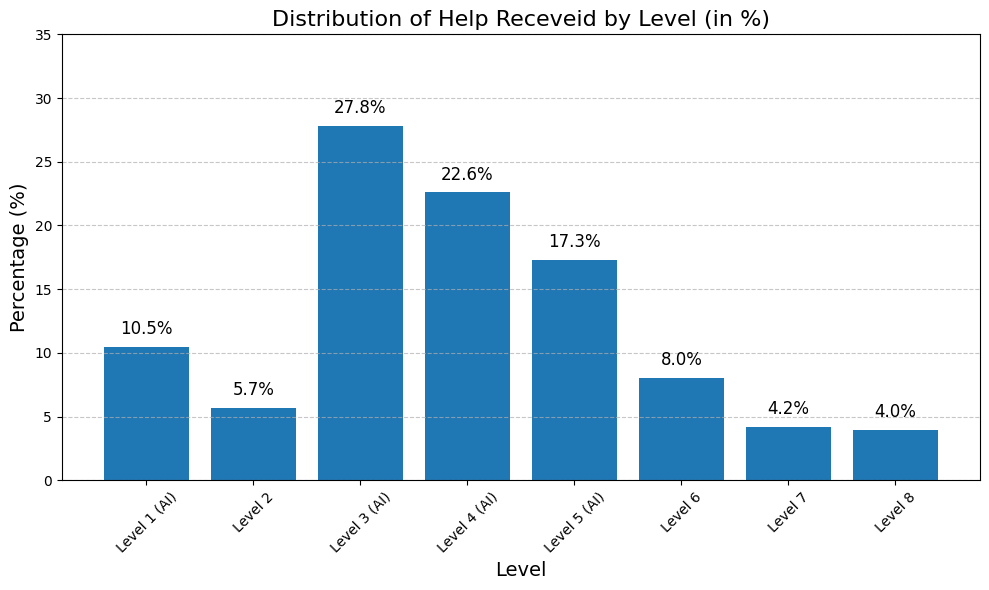

A group - Help given by AI (in %):
78.16037735849056
-----------------------------------------------------------------------
A group - Average received help for each type:
_object_id
https://py-rates.org/xAPI/activities/helps/ask-teacher       7.987952
https://py-rates.org/xAPI/activities/helps/control           4.044776
https://py-rates.org/xAPI/activities/helps/implementation    6.075000
https://py-rates.org/xAPI/activities/helps/notion            4.833333
https://py-rates.org/xAPI/activities/helps/solution          3.920000
dtype: float64
A group - Total received help :2120


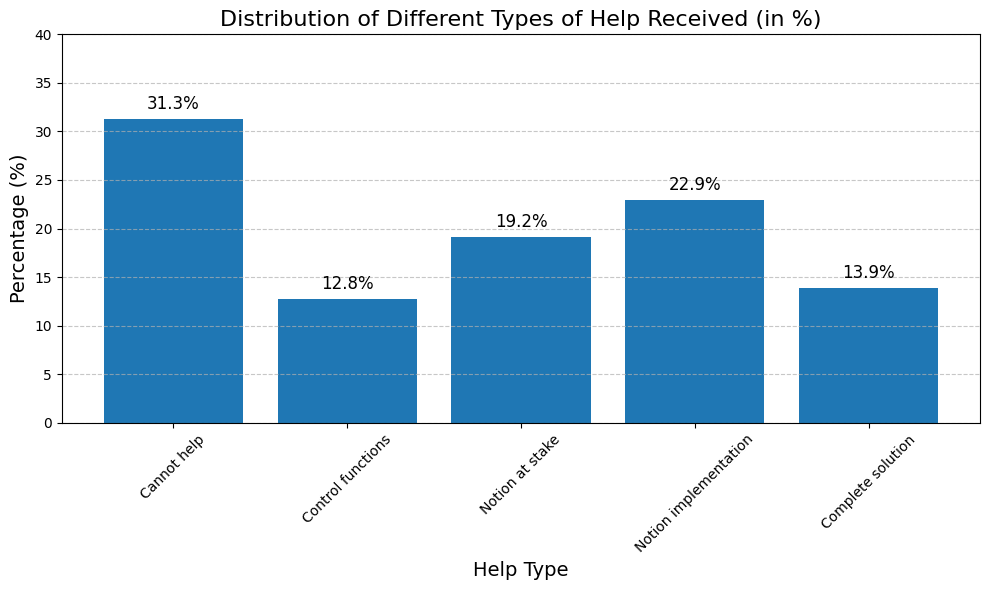

In [76]:
# Filter the rows where _type is "received" and _object_id matches one of the help types
help_received_data = students_interaction_data[
    (students_interaction_data[TYPE_DATA_KEY] == RECEIVED_TYPE) &
    (students_interaction_data[OBJECT_ID_DATA_KEY].isin([ASK_TEACHER_HELP, CONTROL_HELP, IMPLEMENTATION_HELP, NOTION_HELP, SOLUTION_HELP]))
]

help_received_data_MLlevel = help_received_data[
    help_received_data[LEVEL_DATA_KEY].isin(LEVELS_WITH_ML_MODEL)
]

# Get the total number of given helps
total_help_received = help_received_data.shape[0]

# Group by level (_level) and count the number of occurrences
help_counts_by_level = help_received_data.groupby(LEVEL_DATA_KEY).size()

# Calculate the percentage for each level
help_percentage_by_level = (help_counts_by_level / total_help_requests) * 100

print("A group - Help received by level (in %):")
print(help_percentage_by_level)
print(type(help_percentage_by_level))


# Plot a bar chart with percentages
plt.figure(figsize=(10, 6))
plt.bar(help_percentage_by_level.index, help_percentage_by_level.values)

# Update x-axis labels using the labels in HELP_LABELS dictionary
plt.xticks(
    ticks=range(len(LEVEL_LABELS)),
    labels=[LEVEL_LABELS[key] for key in LEVEL_LABELS],
    rotation=45
)

# Add titles and labels
plt.title("Distribution of Help Receveid by Level (in %)", fontsize=16)
plt.xlabel("Level", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.ylim(0, 35)  # Limit y-axis to 40%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of the bars
for index, value in enumerate(help_percentage_by_level.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Filter on AI levels
help_received_data_model = help_received_data[help_received_data[LEVEL_DATA_KEY].isin(LEVELS_WITH_ML_MODEL)]

# Get the total number of AI given helps 
total_help_received_model = help_received_data_model.shape[0]

print("A group - Help given by AI (in %):")
print(total_help_received_model/total_help_received*100)
print("-----------------------------------------------------------------------")

# Group by the help type (_object_id) and count the number of occurrences
help_counts_by_type = help_received_data.groupby(OBJECT_ID_DATA_KEY).size()

# Calculate the percentage for each help type
help_percentage_by_type = (help_counts_by_type / total_help_requests) * 100

# Group by student and help type to count how many times each help was received
help_received_per_student = help_received_data.groupby([STUDENT_DATA_KEY, OBJECT_ID_DATA_KEY]).size()
help_received_per_student_MLlevel = help_received_data_MLlevel.groupby([STUDENT_DATA_KEY, OBJECT_ID_DATA_KEY]).size()

# Calculate the average number of help received per student for each type
average_help_received_per_type = help_received_per_student.groupby(OBJECT_ID_DATA_KEY).mean()

# Print the average received help for each type
print("A group - Average received help for each type:")
print(average_help_received_per_type)

print("A group - Total received help :"+str(total_help_received))

# Reorder helps
help_percentage_by_type = help_percentage_by_type.reindex(HELP_LABELS.keys())

# Plot a bar chart with percentages
plt.figure(figsize=(10, 6))
plt.bar(help_percentage_by_type.index, help_percentage_by_type.values)

# Update x-axis labels using the labels in HELP_LABELS dictionary
plt.xticks(
    ticks=range(len(HELP_LABELS)),
    labels=[HELP_LABELS[key] for key in HELP_LABELS],
    rotation=45
)

# Add titles and labels
plt.title("Distribution of Different Types of Help Received (in %)", fontsize=16)
plt.xlabel("Help Type", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.ylim(0, 40)  # Limit y-axis to 40%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of the bars
for index, value in enumerate(help_percentage_by_type.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### 5.5) (A group) Details about model returns

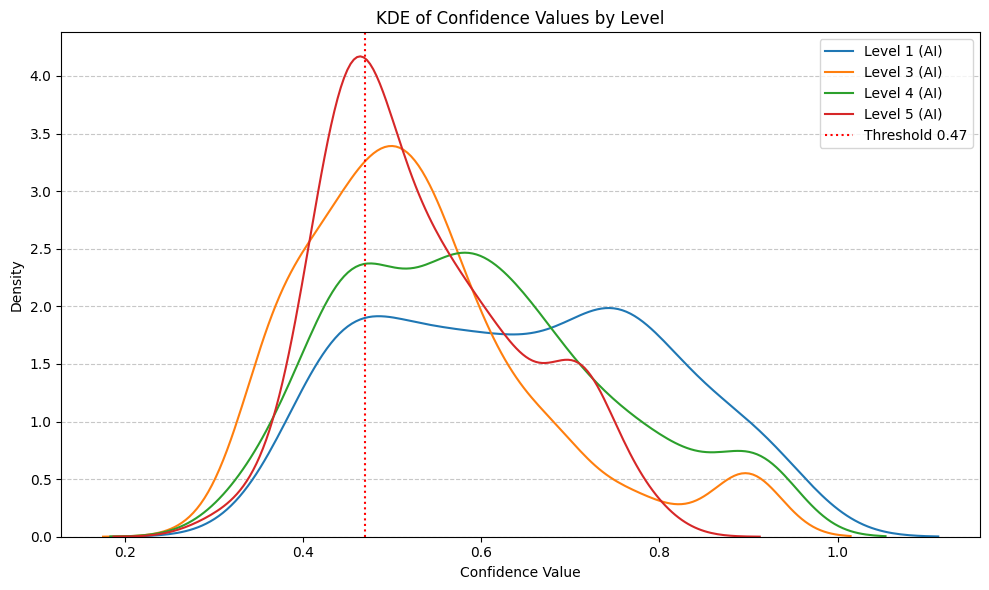

-----------------------------------------------------------------------
A group - Cannot help by reason (%)
Low Confidence       74.660633
Time Issue           21.116139
Technical Problem     4.223228
dtype: float64


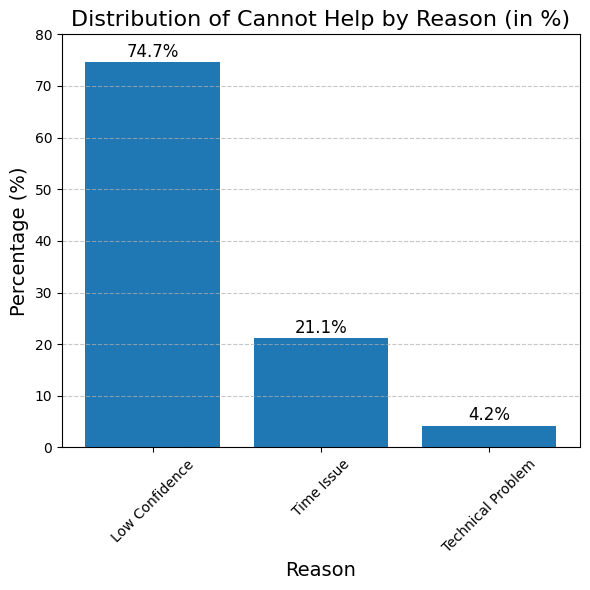

In [13]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Plot KDE for each level
for level in LEVELS_WITH_ML_MODEL:
    level_data = help_received_data_model[help_received_data_model[LEVEL_DATA_KEY] == level]
    sns.kdeplot(
        level_data[HELP_PREDICTION_CONFIDENCE_DATA_KEY].dropna(),
        label=LEVEL_LABELS[level], 
        fill=False
    )

# Add a vertical dotted red line at threshold value 0.47
plt.axvline(x=0.47, color='red', linestyle=':', label='Threshold 0.47')

# Formatting the plot
plt.title("KDE of Confidence Values by Level")
plt.xlabel("Confidence Value")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

print("-----------------------------------------------------------------------")

# Filter on "Cannot help" (_object_id = ASK_TEACHER_HELP)
help_received_data_model_ask_teacher = help_received_data_model[help_received_data_model[OBJECT_ID_DATA_KEY]==ASK_TEACHER_HELP]
total_help_received_data_model_ask_teacher = help_received_data_model_ask_teacher.shape[0]

# Filter on low confidence (_help_prediction_confidence <= 0,47)
help_received_data_model_ask_teacher_low_confidence =  help_received_data_model_ask_teacher[help_received_data_model_ask_teacher[HELP_PREDICTION_CONFIDENCE_DATA_KEY]<=0.47]
total_help_received_data_model_ask_teacher_low_confidence = help_received_data_model_ask_teacher_low_confidence.shape[0]

# Filter on time issue (_help_prediction_confidence > 0,47 and _help_predicted_value=complete solution (4))
help_received_data_model_ask_teacher_time_issue =  help_received_data_model_ask_teacher[(help_received_data_model_ask_teacher[HELP_PREDICTION_CONFIDENCE_DATA_KEY]>0.47) & (help_received_data_model_ask_teacher[HELP_PREDICTED_VALUE_DATA_KEY]==4)]
total_help_received_data_model_ask_teacher_time_issue = help_received_data_model_ask_teacher_time_issue.shape[0]

# Filter on technical problem (_help_prediction_confidence is not set)
help_received_data_model_ask_teacher_technical_pb =  help_received_data_model_ask_teacher[help_received_data_model_ask_teacher[HELP_PREDICTION_CONFIDENCE_DATA_KEY].isna()]
total_help_received_data_model_ask_teacher_technical_pb = help_received_data_model_ask_teacher_technical_pb.shape[0]

# Create a Series with the results
help_received_data_model_ask_teacher_reason = pd.Series({
    "Low Confidence": total_help_received_data_model_ask_teacher_low_confidence,
    "Time Issue": total_help_received_data_model_ask_teacher_time_issue,
    "Technical Problem": total_help_received_data_model_ask_teacher_technical_pb,
})

help_received_data_model_ask_teacher_reason = help_received_data_model_ask_teacher_reason/total_help_received_data_model_ask_teacher*100

print("A group - Cannot help by reason (%)")
print(help_received_data_model_ask_teacher_reason)

# Plot a bar chart with percentages
plt.figure(figsize=(6, 6))
plt.bar(help_received_data_model_ask_teacher_reason.index, help_received_data_model_ask_teacher_reason.values)

# Update x-axis labels using the labels in HELP_LABELS dictionary
plt.xticks(
    #ticks=range(len(LEVEL_LABELS)),
    #labels=[LEVEL_LABELS[key] for key in LEVEL_LABELS],
    rotation=45
)

# Add titles and labels
plt.title("Distribution of Cannot Help by Reason (in %)", fontsize=16)
plt.xlabel("Reason", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.ylim(0, 80)  # Limit y-axis to 40%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of the bars
for index, value in enumerate(help_received_data_model_ask_teacher_reason.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()





### 5.6) Average reached level

In [14]:
# Filter the rows where _type is "started"
started_activities_A = students_A_interaction_data[students_A_interaction_data[TYPE_DATA_KEY] == STARTED_TYPE].copy()

# Apply the mapping to the _level column (ex "Level1" -> 1)
started_activities_A.loc[:, 'level_numeric'] = started_activities_A[LEVEL_DATA_KEY].map(LEVEL_MAPPING)

started_activities_A.to_excel("debug/debug_started_activities_A.xlsx")

# Group by student and find the maximum level reached
max_level_per_student_A = started_activities_A.groupby(STUDENT_DATA_KEY)['level_numeric'].max()

max_level_per_student_A.to_excel("debug/debug_max_level_per_student_A.xlsx")

# Calculate the average of the maximum reached levels
average_max_level_A = max_level_per_student_A.mean()

print("A Group - Average reached level : "+str(average_max_level_A))

started_activities_B = students_B_interaction_data[students_B_interaction_data[TYPE_DATA_KEY] == STARTED_TYPE].copy()

# Apply the mapping to the _level column
started_activities_B.loc[:, 'level_numeric'] = started_activities_B[LEVEL_DATA_KEY].map(LEVEL_MAPPING)

started_activities_B.to_excel("debug/debug_started_activities_B.xlsx")

# Group by student and find the maximum level reached
max_level_per_student_B = started_activities_B.groupby(STUDENT_DATA_KEY)['level_numeric'].max()

max_level_per_student_B.to_excel("debug/debug_max_level_per_student_B.xlsx")

# Calculate the average of the maximum levels
average_max_level_B = max_level_per_student_B.mean()

print("B Group - Average reached level : "+str(average_max_level_B))

# T-test for independent groups 
t_test = stats.ttest_ind(max_level_per_student_A, max_level_per_student_B)
print(f"T-test independent / p-value = {t_test.pvalue}")

# Mann-Whitney U for independent groups
mann_whitney_test = stats.mannwhitneyu(max_level_per_student_A, max_level_per_student_B)
print(f"Mann-Whitney U test / p-value = {mann_whitney_test.pvalue}")

# Difference
diff = (average_max_level_A - average_max_level_B)
print(f"Difference: {diff}")
diff_percent = (average_max_level_A - average_max_level_B) / average_max_level_B * 100
print(f"Difference in percentage: {diff_percent}")

A Group - Average reached level : 5.604395604395604
B Group - Average reached level : 4.494623655913978
T-test independent / p-value = 1.7314653717101102e-05
Mann-Whitney U test / p-value = 2.184529768216201e-05
Difference: 1.109771948481626
Difference in percentage: 24.691098375308908


### 5.7) Learning general results

In [15]:
# Calculate the maximum score (sum of highest possible scores per question)
max_score_general = sum(max(answer.values()) for answer in ANSWERS_SCORES.values())

# Function to calculate a normalized score for a student
def calculate_score(student,max_score):
    score = 0
    for question, answer in student.items():
        if question in ANSWERS_SCORES and answer in ANSWERS_SCORES[question]:
            score += ANSWERS_SCORES[question][answer]
    return round((score/max_score)*100)

students_A_pre_test_data_temp = students_A_pre_test_data.copy()
students_A_post_test_data_temp = students_A_post_test_data.copy()

# Calculate pre-test scores
students_A_pre_test_data_temp['pre_score'] = students_A_pre_test_data_temp.apply(
    calculate_score, axis=1, max_score=max_score_general
)

# Calculate post-test scores
students_A_post_test_data_temp['post_score'] = students_A_post_test_data_temp.apply(
    calculate_score, axis=1, max_score=max_score_general
)

# Merge the scores into a single DataFrame
students_A_scores = pd.merge(
    students_A_pre_test_data_temp[['_code', 'pre_score']],
    students_A_post_test_data_temp[['_code', 'post_score']],
    on='_code',
    how='outer'
)

# Calculate the difference between pre-test and post-test scores
students_A_scores['score_diff'] = students_A_scores['post_score'] - students_A_scores['pre_score']

students_B_pre_test_data_temp = students_B_pre_test_data.copy()
students_B_post_test_data_temp = students_B_post_test_data.copy()

# Calculate pre-test scores
students_B_pre_test_data_temp['pre_score'] = students_B_pre_test_data_temp.apply(
    calculate_score, axis=1, max_score=max_score_general
)

# Calculate post-test scores
students_B_post_test_data_temp['post_score'] = students_B_post_test_data_temp.apply(
    calculate_score, axis=1, max_score=max_score_general
)

# Merge the scores into a single DataFrame based on `_code`
students_B_scores = pd.merge(
    students_B_pre_test_data_temp[['_code', 'pre_score']],
    students_B_post_test_data_temp[['_code', 'post_score']],
    on='_code',
    how='outer'
)

# Calculate the difference between pre-test and post-test scores
students_B_scores['score_diff'] = students_B_scores['post_score'] - students_B_scores['pre_score']

# Display the resulting DataFrame
# print(students_A_scores.head(30))
# print(students_B_scores.head(30))

# Export to Excel file for manual checking
students_A_scores.to_excel("debug/debug_general_learning_A.xlsx")
students_B_scores.to_excel("debug/debug_general_learning_B.xlsx")

# Mean calculation
average_pre_score_A = students_A_scores["pre_score"].mean()
average_post_score_A = students_A_scores["post_score"].mean()
print("A Group - Average pre-test score (%) : "+str(average_pre_score_A))
print("A Group - Average post-test score (%) : "+str(average_post_score_A))
# T-test for paired groups 
t_test = stats.ttest_rel(students_A_scores["pre_score"], students_A_scores["post_score"])
print(f"A Group - Difference between pre-test & post-test : T-test paired / p-value = {t_test.pvalue}")
# Wilcoxon test for paired groups
wilcoxon_test = stats.wilcoxon(students_A_scores["pre_score"], students_A_scores["post_score"])
print(f"A Group - Difference between pre-test & post-test : Wilcoxon test / p-value = {wilcoxon_test.pvalue}")
print("-----------------------------------------------------------------------")
average_pre_score_B = students_B_scores["pre_score"].mean()
average_post_score_B = students_B_scores["post_score"].mean()
print("B Group - Average pre-test score (%) : "+str(average_pre_score_B))
print("B Group - Average post-test score (%) : "+str(average_post_score_B))
# T-test for paired groups 
t_test = stats.ttest_rel(students_B_scores["pre_score"], students_B_scores["post_score"])
print(f"B Group - Difference between pre-test & post-test : T-test paired / p-value = {t_test.pvalue}")
# Wilcoxon test for paired groups
wilcoxon_test = stats.wilcoxon(students_B_scores["pre_score"], students_B_scores["post_score"])
print(f"B Group - Difference between pre-test & post-test : Wilcoxon test / p-value = {wilcoxon_test.pvalue}")
print("-----------------------------------------------------------------------")
average_learning_A = students_A_scores["score_diff"].mean()
average_learning_B = students_B_scores["score_diff"].mean()
print("A Group - Average general learning (post-pre) : "+str(average_learning_A))
print("B Group - Average general learning (post-pre): "+str(average_learning_B))
print("General learning difference between groups : "+str(average_learning_A-average_learning_B))

# T-test for independent groups
t_test = stats.ttest_ind(students_A_scores["score_diff"], students_B_scores["score_diff"])
print(f"General learning difference : T-test independent  / p-value = {t_test.pvalue}")

# Mann-Whitney U test for independent groups
mann_whitney_test = stats.mannwhitneyu(students_A_scores["score_diff"], students_B_scores["score_diff"])
print(f"General learning difference : Mann-Whitney U test / p-value = {mann_whitney_test.pvalue}")



A Group - Average pre-test score (%) : 46.51578947368421
A Group - Average post-test score (%) : 53.11578947368421
A Group - Difference between pre-test & post-test : T-test paired / p-value = 4.604686942106228e-05
A Group - Difference between pre-test & post-test : Wilcoxon test / p-value = 0.00018850868420880319
-----------------------------------------------------------------------
B Group - Average pre-test score (%) : 49.93684210526316
B Group - Average post-test score (%) : 56.810526315789474
B Group - Difference between pre-test & post-test : T-test paired / p-value = 0.00018571438602964655
B Group - Difference between pre-test & post-test : Wilcoxon test / p-value = 0.00023761709249082682
-----------------------------------------------------------------------
A Group - Average general learning (post-pre) : 6.6
B Group - Average general learning (post-pre): 6.873684210526315
General learning difference between groups : -0.27368421052631575
General learning difference : T-test in

### 5.8) Learning results by notion

In [16]:
# Separate data for different notions

students_A_pre_test_data_var = students_A_pre_test_data[[CODE_DATA_KEY]+VAR_NOTION_QUESTIONS]
students_B_pre_test_data_var = students_B_pre_test_data[[CODE_DATA_KEY]+VAR_NOTION_QUESTIONS]
students_A_post_test_data_var = students_A_post_test_data[[CODE_DATA_KEY]+VAR_NOTION_QUESTIONS]
students_B_post_test_data_var = students_B_post_test_data[[CODE_DATA_KEY]+VAR_NOTION_QUESTIONS]

students_A_pre_test_data_for_loop = students_A_pre_test_data[[CODE_DATA_KEY]+FOR_LOOP_NOTION_QUESTIONS]
students_B_pre_test_data_for_loop = students_B_pre_test_data[[CODE_DATA_KEY]+FOR_LOOP_NOTION_QUESTIONS]
students_A_post_test_data_for_loop = students_A_post_test_data[[CODE_DATA_KEY]+FOR_LOOP_NOTION_QUESTIONS]
students_B_post_test_data_for_loop = students_B_post_test_data[[CODE_DATA_KEY]+FOR_LOOP_NOTION_QUESTIONS]

students_A_pre_test_data_cond = students_A_pre_test_data[[CODE_DATA_KEY]+COND_NOTION_QUESTIONS]
students_B_pre_test_data_cond = students_B_pre_test_data[[CODE_DATA_KEY]+COND_NOTION_QUESTIONS]
students_A_post_test_data_cond = students_A_post_test_data[[CODE_DATA_KEY]+COND_NOTION_QUESTIONS]
students_B_post_test_data_cond = students_B_post_test_data[[CODE_DATA_KEY]+COND_NOTION_QUESTIONS]


Variable notion

In [17]:
# Calculate the maximum score (sum of highest possible scores per question)
max_score_var = sum(max(ANSWERS_SCORES[question].values()) for question in VAR_NOTION_QUESTIONS)

students_A_pre_test_data_var_temp = students_A_pre_test_data_var.copy()
students_A_post_test_data_var_temp = students_A_post_test_data_var.copy()

# Calculate pre-test scores
students_A_pre_test_data_var_temp['pre_score'] = students_A_pre_test_data_var_temp.apply(
    calculate_score, axis=1, max_score=max_score_var
)

# Calculate post-test scores
students_A_post_test_data_var_temp['post_score'] = students_A_post_test_data_var_temp.apply(
    calculate_score, axis=1, max_score=max_score_var
)

# Merge the scores into a single DataFrame
students_A_scores_var = pd.merge(
    students_A_pre_test_data_var_temp[['_code', 'pre_score']],
    students_A_post_test_data_var_temp[['_code', 'post_score']],
    on='_code',
    how='outer'
)

average_pre_score_A_var = students_A_scores_var["pre_score"].mean()
average_post_score_A_var = students_A_scores_var["post_score"].mean()
print("A Group - Average variable pre-test score (%) : "+str(average_pre_score_A_var))
print("A Group - Average variable post-test score (%) : "+str(average_post_score_A_var))
# T-test for paired groups 
t_test = stats.ttest_rel(students_A_scores_var["pre_score"], students_A_scores_var["post_score"])
print(f"A Group - Difference between pre-test & post-test on variable : T-test paired / p-value = {t_test.pvalue}")
# Wilcoxon test for paired groups
wilcoxon_test = stats.wilcoxon(students_A_scores_var["pre_score"], students_A_scores_var["post_score"])
print(f"A Group - Difference between pre-test & post-test on variable : Wilcoxon test / p-value = {wilcoxon_test.pvalue}")
print("-----------------------------------------------------------------------")


# Calculate the difference between pre-test and post-test scores
students_A_scores_var['score_diff'] = students_A_scores_var['post_score'] - students_A_scores_var['pre_score']


students_B_pre_test_data_var_temp = students_B_pre_test_data_var.copy()
students_B_post_test_data_var_temp = students_B_post_test_data_var.copy()

# Calculate pre-test scores
students_B_pre_test_data_var_temp['pre_score'] = students_B_pre_test_data_var_temp.apply(
    calculate_score, axis=1, max_score=max_score_var
)

# Calculate post-test scores
students_B_post_test_data_var_temp['post_score'] = students_B_post_test_data_var_temp.apply(
    calculate_score, axis=1, max_score=max_score_var
)

# Merge the scores into a single DataFrame
students_B_scores_var = pd.merge(
    students_B_pre_test_data_var_temp[['_code', 'pre_score']],
    students_B_post_test_data_var_temp[['_code', 'post_score']],
    on='_code',
    how='outer'
)

average_pre_score_B_var = students_B_scores_var["pre_score"].mean()
average_post_score_B_var = students_B_scores_var["post_score"].mean()
print("B Group - Average variable pre-test score (%) : "+str(average_pre_score_B_var))
print("B Group - Average variable post-test score (%) : "+str(average_post_score_B_var))
# T-test for paired groups 
t_test = stats.ttest_rel(students_B_scores_var["pre_score"], students_B_scores_var["post_score"])
print(f"B Group - Difference between pre-test & post-test on variable : T-test paired / p-value = {t_test.pvalue}")
# Wilcoxon test for paired groups
wilcoxon_test = stats.wilcoxon(students_B_scores_var["pre_score"], students_B_scores_var["post_score"])
print(f"B Group - Difference between pre-test & post-test on variable : Wilcoxon test / p-value = {wilcoxon_test.pvalue}")
print("-----------------------------------------------------------------------")



# Calculate the difference between pre-test and post-test scores
students_B_scores_var['score_diff'] = students_B_scores_var['post_score'] - students_B_scores_var['pre_score']

average_learning_A_var = students_A_scores_var["score_diff"].mean()
average_learning_B_var = students_B_scores_var["score_diff"].mean()
print("A Group - Average variable notion learning : "+str(average_learning_A_var))
print("B Group - Average variable notion learning : "+str(average_learning_B_var))
print("Variable notion learning difference between groups : "+str(average_learning_A_var-average_learning_B_var))

# T-test for independent groups 
t_test = stats.ttest_ind(students_A_scores_var["score_diff"], students_B_scores_var["score_diff"])
print(f"T-test independent / p-value = {t_test.pvalue}")

# Mann-Whitney U test for independent groups
mann_whitney_test = stats.mannwhitneyu(students_A_scores_var["score_diff"], students_B_scores_var["score_diff"])
print(f"Mann-Whitney U test /  p-value = {mann_whitney_test.pvalue}")




A Group - Average variable pre-test score (%) : 52.305263157894736
A Group - Average variable post-test score (%) : 62.48421052631579
A Group - Difference between pre-test & post-test on variable : T-test paired / p-value = 0.00036244616836951667
A Group - Difference between pre-test & post-test on variable : Wilcoxon test / p-value = 0.0041470908191483654
-----------------------------------------------------------------------
B Group - Average variable pre-test score (%) : 56.536842105263155
B Group - Average variable post-test score (%) : 67.07368421052631
B Group - Difference between pre-test & post-test on variable : T-test paired / p-value = 0.0011510734548652113
B Group - Difference between pre-test & post-test on variable : Wilcoxon test / p-value = 0.008447788660678279
-----------------------------------------------------------------------
A Group - Average variable notion learning : 10.178947368421053
B Group - Average variable notion learning : 10.536842105263158
Variable not

For loop notion

In [18]:
# Calculate the maximum score (sum of highest possible scores per question)
max_score_for_loop = sum(max(ANSWERS_SCORES[question].values()) for question in FOR_LOOP_NOTION_QUESTIONS)

students_A_pre_test_data_for_loop_temp = students_A_pre_test_data_for_loop.copy()
students_A_post_test_data_for_loop_temp = students_A_post_test_data_for_loop.copy()

# Calculate pre-test scores
students_A_pre_test_data_for_loop_temp['pre_score'] = students_A_pre_test_data_for_loop_temp.apply(
    calculate_score, axis=1, max_score=max_score_for_loop
)

# Calculate post-test scores
students_A_post_test_data_for_loop_temp['post_score'] = students_A_post_test_data_for_loop_temp.apply(
    calculate_score, axis=1, max_score=max_score_for_loop
)

# Merge the scores into a single DataFrame
students_A_scores_for_loop = pd.merge(
    students_A_pre_test_data_for_loop_temp[['_code', 'pre_score']],
    students_A_post_test_data_for_loop_temp[['_code', 'post_score']],
    on='_code',
    how='outer'
)

average_pre_score_A_for_loop = students_A_scores_for_loop["pre_score"].mean()
average_post_score_A_for_loop = students_A_scores_for_loop["post_score"].mean()
print("A Group - Average for loop pre-test score (%) : "+str(average_pre_score_A_for_loop))
print("A Group - Average for loop post-test score (%) : "+str(average_post_score_A_for_loop))
# T-test for paired groups 
t_test = stats.ttest_rel(students_A_scores_for_loop["pre_score"], students_A_scores_for_loop["post_score"])
print(f"A Group - Difference between pre-test & post-test on for loop : T-test paired / p-value = {t_test.pvalue}")
# Wilcoxon test for paired groups
wilcoxon_test = stats.wilcoxon(students_A_scores_for_loop["pre_score"], students_A_scores_for_loop["post_score"])
print(f"A Group - Difference between pre-test & post-test on for loop : Wilcoxon test / p-value = {wilcoxon_test.pvalue}")
print("-----------------------------------------------------------------------")


# Calculate the difference between pre-test and post-test scores
students_A_scores_for_loop['score_diff'] = students_A_scores_for_loop['post_score'] - students_A_scores_for_loop['pre_score']


students_B_pre_test_data_for_loop_temp = students_B_pre_test_data_for_loop.copy()
students_B_post_test_data_for_loop_temp = students_B_post_test_data_for_loop.copy()

# Calculate pre-test scores
students_B_pre_test_data_for_loop_temp['pre_score'] = students_B_pre_test_data_for_loop_temp.apply(
    calculate_score, axis=1, max_score=max_score_for_loop
)

# Calculate post-test scores
students_B_post_test_data_for_loop_temp['post_score'] = students_B_post_test_data_for_loop_temp.apply(
    calculate_score, axis=1, max_score=max_score_for_loop
)

# Merge the scores into a single DataFrame
students_B_scores_for_loop = pd.merge(
    students_B_pre_test_data_for_loop_temp[['_code', 'pre_score']],
    students_B_post_test_data_for_loop_temp[['_code', 'post_score']],
    on='_code',
    how='outer'
)

average_pre_score_B_for_loop = students_B_scores_for_loop["pre_score"].mean()
average_post_score_B_for_loop = students_B_scores_for_loop["post_score"].mean()
print("B Group - Average for loop pre-test score (%) : "+str(average_pre_score_B_for_loop))
print("B Group - Average for loop post-test score (%) : "+str(average_post_score_B_for_loop))
# T-test for paired groups 
t_test = stats.ttest_rel(students_B_scores_for_loop["pre_score"], students_B_scores_for_loop["post_score"])
print(f"B Group - Difference between pre-test & post-test on for loop : T-test paired / p-value = {t_test.pvalue}")
# Wilcoxon test for paired groups
wilcoxon_test = stats.wilcoxon(students_B_scores_for_loop["pre_score"], students_B_scores_for_loop["post_score"])
print(f"B Group - Difference between pre-test & post-test on for loop : Wilcoxon test / p-value = {wilcoxon_test.pvalue}")
print("-----------------------------------------------------------------------")


# Calculate the difference between pre-test and post-test scores
students_B_scores_for_loop['score_diff'] = students_B_scores_for_loop['post_score'] - students_B_scores_for_loop['pre_score']

average_learning_A_for_loop = students_A_scores_for_loop["score_diff"].mean()
average_learning_B_for_loop = students_B_scores_for_loop["score_diff"].mean()
print("A Group - Average for loop notion learning : "+str(average_learning_A_for_loop))
print("B Group - Average for loop notion learning : "+str(average_learning_B_for_loop))
print("For loop notion learning difference between groups : "+str(average_learning_A_for_loop-average_learning_B_for_loop))
# T-test for independent groups 
t_test = stats.ttest_ind(students_A_scores_for_loop["score_diff"], students_B_scores_for_loop["score_diff"])
print(f"T-test independent / p-value = {t_test.pvalue}")

# Mann-Whitney U for independent groups
mann_whitney_test = stats.mannwhitneyu(students_A_scores_for_loop["score_diff"], students_B_scores_for_loop["score_diff"])
print(f"Mann-Whitney U test / p-value = {mann_whitney_test.pvalue}")

A Group - Average for loop pre-test score (%) : 49.48421052631579
A Group - Average for loop post-test score (%) : 43.747368421052634
A Group - Difference between pre-test & post-test on for loop : T-test paired / p-value = 0.027512931834862857
A Group - Difference between pre-test & post-test on for loop : Wilcoxon test / p-value = 0.011272321483193105
-----------------------------------------------------------------------
B Group - Average for loop pre-test score (%) : 51.94736842105263
B Group - Average for loop post-test score (%) : 48.77894736842105
B Group - Difference between pre-test & post-test on for loop : T-test paired / p-value = 0.20383812176041255
B Group - Difference between pre-test & post-test on for loop : Wilcoxon test / p-value = 0.361617273410741
-----------------------------------------------------------------------
A Group - Average for loop notion learning : -5.7368421052631575
B Group - Average for loop notion learning : -3.168421052631579
For loop notion lear

Conditional notion

In [19]:
# Calculate the maximum score (sum of highest possible scores per question)
max_score_cond = sum(max(ANSWERS_SCORES[question].values()) for question in COND_NOTION_QUESTIONS)

students_A_pre_test_data_cond_temp = students_A_pre_test_data_cond.copy()
students_A_post_test_data_cond_temp = students_A_post_test_data_cond.copy()

# Calculate pre-test scores
students_A_pre_test_data_cond_temp['pre_score'] = students_A_pre_test_data_cond_temp.apply(
    calculate_score, axis=1, max_score=max_score_cond
)

# Calculate post-test scores
students_A_post_test_data_cond_temp['post_score'] = students_A_post_test_data_cond_temp.apply(
    calculate_score, axis=1, max_score=max_score_cond
)

# Merge the scores into a single DataFrame
students_A_scores_cond = pd.merge(
    students_A_pre_test_data_cond_temp[['_code', 'pre_score']],
    students_A_post_test_data_cond_temp[['_code', 'post_score']],
    on='_code',
    how='outer'
)

average_pre_score_A_cond = students_A_scores_cond["pre_score"].mean()
average_post_score_A_cond = students_A_scores_cond["post_score"].mean()
print("A Group - Average conditional pre-test score (%) : "+str(average_pre_score_A_cond))
print("A Group - Average conditional post-test score (%) : "+str(average_post_score_A_cond))
# T-test for paired groups 
t_test = stats.ttest_rel(students_A_scores_cond["pre_score"], students_A_scores_cond["post_score"])
print(f"A Group - Difference between pre-test & post-test on conditional : T-test paired / p-value = {t_test.pvalue}")
# Wilcoxon test for paired groups
wilcoxon_test = stats.wilcoxon(students_A_scores_cond["pre_score"], students_A_scores_cond["post_score"])
print(f"A Group - Difference between pre-test & post-test on conditional : Wilcoxon test / p-value = {wilcoxon_test.pvalue}")
print("-----------------------------------------------------------------------")


# Calculate the difference between pre-test and post-test scores
students_A_scores_cond['score_diff'] = students_A_scores_cond['post_score'] - students_A_scores_cond['pre_score']


students_B_pre_test_data_cond_temp = students_B_pre_test_data_cond.copy()
students_B_post_test_data_cond_temp = students_B_post_test_data_cond.copy()

# Calculate pre-test scores
students_B_pre_test_data_cond_temp['pre_score'] = students_B_pre_test_data_cond_temp.apply(
    calculate_score, axis=1, max_score=max_score_cond
)

# Calculate post-test scores
students_B_post_test_data_cond_temp['post_score'] = students_B_post_test_data_cond_temp.apply(
    calculate_score, axis=1, max_score=max_score_cond
)

# Merge the scores into a single DataFrame
students_B_scores_cond = pd.merge(
    students_B_pre_test_data_cond_temp[['_code', 'pre_score']],
    students_B_post_test_data_cond_temp[['_code', 'post_score']],
    on='_code',
    how='outer'
)

average_pre_score_B_cond = students_B_scores_cond["pre_score"].mean()
average_post_score_B_cond = students_B_scores_cond["post_score"].mean()
print("B Group - Average conditional pre-test score (%) : "+str(average_pre_score_B_cond))
print("B Group - Average conditional post-test score (%) : "+str(average_post_score_B_cond))
# T-test for paired groups 
t_test = stats.ttest_rel(students_B_scores_cond["pre_score"], students_B_scores_cond["post_score"])
print(f"B Group - Difference between pre-test & post-test on conditional : T-test paired / p-value = {t_test.pvalue}")
# Wilcoxon test for paired groups
wilcoxon_test = stats.wilcoxon(students_B_scores_cond["pre_score"], students_B_scores_cond["post_score"])
print(f"B Group - Difference between pre-test & post-test on conditional : Wilcoxon test / p-value = {wilcoxon_test.pvalue}")
print("-----------------------------------------------------------------------")


# Calculate the difference between pre-test and post-test scores
students_B_scores_cond['score_diff'] = students_B_scores_cond['post_score'] - students_B_scores_cond['pre_score']

average_learning_A_cond = students_A_scores_cond["score_diff"].mean()
average_learning_B_cond = students_B_scores_cond["score_diff"].mean()
print("A Group - Average conditional notion learning : "+str(average_learning_A_cond))
print("B Group - Average conditional notion learning : "+str(average_learning_B_cond))
print("Conditional notion learning difference between groups : "+str(average_learning_A_cond-average_learning_B_cond))
# T-test for independent groups 
t_test = stats.ttest_ind(students_A_scores_cond["score_diff"], students_B_scores_cond["score_diff"])
print(f"T-test independent / p-value = {t_test.pvalue}")

# Mann-Whitney U for independent groups
mann_whitney_test = stats.mannwhitneyu(students_A_scores_cond["score_diff"], students_B_scores_cond["score_diff"])
print(f"Mann-Whitney U test / p-value = {mann_whitney_test.pvalue}")

A Group - Average conditional pre-test score (%) : 37.85263157894737
A Group - Average conditional post-test score (%) : 52.96842105263158
A Group - Difference between pre-test & post-test on conditional : T-test paired / p-value = 4.654547298011428e-06
A Group - Difference between pre-test & post-test on conditional : Wilcoxon test / p-value = 1.833184813215334e-05
-----------------------------------------------------------------------
B Group - Average conditional pre-test score (%) : 41.36842105263158
B Group - Average conditional post-test score (%) : 54.410526315789475
B Group - Difference between pre-test & post-test on conditional : T-test paired / p-value = 1.3775661248653312e-05
B Group - Difference between pre-test & post-test on conditional : Wilcoxon test / p-value = 3.729147816776454e-05
-----------------------------------------------------------------------
A Group - Average conditional notion learning : 15.115789473684211
B Group - Average conditional notion learning : 1

### 5.9) (A group) Qualitatives aspects (TODO : don't take Cergy into account)

In [20]:
print("Did you find the tutor helps useful to progress in the game? (0 to 100)")
print("Average score: "+str(students_A_post_test_data[QA_ROW].mean()))

print("Would you like to have this kind of help again in the future? (0 to 100)")
print("Average score: "+str(students_A_post_test_data[QB_ROW].mean()))

Did you find the tutor helps useful to progress in the game? (0 to 100)
Average score: 53.49473684210526
Would you like to have this kind of help again in the future? (0 to 100)
Average score: 57.90526315789474


### 5.10) (A group) Impacts of help types and amount of help on metrics

**Reconcile data about scores, max_level and help received into one dataframe**

In [146]:
MAP_A = LAN_S3+LAN_S10A+CER_A
mapping = {item["id"]: item["game"] for item in MAP_A}

# Merge students_A_scores and max_level_per_student_A
students_A_scores[STUDENT_DATA_KEY] = students_A_scores[CODE_DATA_KEY].map(mapping)
students_A_scores[STUDENT_DATA_KEY] = students_A_scores[STUDENT_DATA_KEY].astype(str)

max_level_per_student_A2 = max_level_per_student_A.reset_index()
max_level_per_student_A2 = max_level_per_student_A2.rename(columns={max_level_per_student_A2.columns[-1]: 'maxlevel'})

students_A_alldata = pd.merge(students_A_scores, max_level_per_student_A2, on=STUDENT_DATA_KEY, how='inner')

# Merge new students_A_alldata and help_received_per_student
help_received_per_student2 = help_received_per_student.reset_index() #all help
#help_received_per_student2 = help_received_per_student_MLlevel.reset_index() #help by AI only
help_received_per_student2[STUDENT_DATA_KEY] = help_received_per_student2[STUDENT_DATA_KEY].astype(str)
help_received_per_student2 = help_received_per_student2.rename(columns={help_received_per_student2.columns[-1]: 'nbhelp'})

students_A_alldata = pd.merge(students_A_alldata, help_received_per_student2, on=STUDENT_DATA_KEY, how='inner')

# merge with teacher calls for LAN students
calls_per_student_A2 = calls_per_student_A.reset_index()
calls_per_student_A2[STUDENT_DATA_KEY] = calls_per_student_A2[STUDENT_DATA_KEY].astype(str)
calls_per_student_A2 = calls_per_student_A2.rename(columns={calls_per_student_A2.columns[-1]: 'nbteachercall'})

students_A_alldata = pd.merge(students_A_alldata, calls_per_student_A2, on=STUDENT_DATA_KEY, how='left')

# Display the result
print("students_A_alldata")
print(students_A_alldata.head())
print(students_A_alldata.info())

# save
students_A_alldata.to_csv("data/group_A_cleaned_alldata.csv")

# Group by help type
students_A_alldata_grouped = students_A_alldata.groupby(CODE_DATA_KEY, as_index=False).agg({
    'nbhelp': 'sum', # sum nb_help across help type
    'pre_score': 'first',   
    'post_score': 'first', 
    'score_diff': 'first', 
    'maxlevel': 'first'  
})

# Display the result
print("\nstudents_A_alldata_grouped")
print(students_A_alldata_grouped.head())
print(students_A_alldata_grouped.info())

students_A_alldata
   _code  pre_score  post_score  score_diff _student  maxlevel  \
0      1         67          78          11  mqDmUa3         8   
1      1         67          78          11  mqDmUa3         8   
2      1         67          78          11  mqDmUa3         8   
3      1         67          78          11  mqDmUa3         8   
4      1         67          78          11  mqDmUa3         8   

                                          _object_id  nbhelp  nbteachercall  
0  https://py-rates.org/xAPI/activities/helps/ask...       4            0.0  
1  https://py-rates.org/xAPI/activities/helps/con...       5            0.0  
2  https://py-rates.org/xAPI/activities/helps/imp...      22            0.0  
3  https://py-rates.org/xAPI/activities/helps/notion      10            0.0  
4  https://py-rates.org/xAPI/activities/helps/sol...       8            0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column 

In [157]:
#exploratory mixed models on impact of nbhelp in score_diff and maxlevel
formula = "score_diff ~ nbhelp*_object_id"
print(formula)
model = smf.mixedlm(formula, students_A_alldata, groups=students_A_alldata["_object_id"])
result = model.fit()
print(result.summary())

formula = "post_score ~ nbhelp*_object_id +pre_score"
print(formula)
model = smf.mixedlm(formula, students_A_alldata, groups=students_A_alldata["_object_id"])
result = model.fit()
print(result.summary())

formula = "maxlevel ~ nbhelp*_object_id +pre_score"
print(formula)
model = smf.mixedlm(formula, students_A_alldata, groups=students_A_alldata["_object_id"])
result = model.fit()
print(result.summary())

score_diff ~ nbhelp*_object_id
                                           Mixed Linear Model Regression Results
Model:                                   MixedLM                       Dependent Variable:                       score_diff
No. Observations:                        388                           Method:                                   REML      
No. Groups:                              5                             Scale:                                    227.6879  
Min. group size:                         67                            Log-Likelihood:                           -1590.8118
Max. group size:                         83                            Converged:                                Yes       
Mean group size:                         77.6                                                                              
---------------------------------------------------------------------------------------------------------------------------
                    

C:\Users\Sébastien\AppData\Roaming\Python\Python313\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [158]:
#follow up with non-parametric Kendal tau

df_control = students_A_alldata[students_A_alldata[OBJECT_ID_DATA_KEY] == CONTROL_HELP]
df_notion = students_A_alldata[students_A_alldata[OBJECT_ID_DATA_KEY] == NOTION_HELP]
df_implementation = students_A_alldata[students_A_alldata[OBJECT_ID_DATA_KEY] == IMPLEMENTATION_HELP]
df_solution = students_A_alldata[students_A_alldata[OBJECT_ID_DATA_KEY] == SOLUTION_HELP]
df_ask = students_A_alldata[students_A_alldata[OBJECT_ID_DATA_KEY] == ASK_TEACHER_HELP]

ps = []

tau = kendalltau(df_control['score_diff'], df_control['nbhelp'])
ps.append(tau.pvalue)
print("Control - ", "score_diff: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
tau = kendalltau(df_control['maxlevel'], df_control['nbhelp'])
ps.append(tau.pvalue)
print("Control - ", "max_level: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
print()

tau = kendalltau(df_notion['score_diff'], df_notion['nbhelp'])
ps.append(tau.pvalue)
print("Notion - ", "score_diff: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
tau = kendalltau(df_notion['maxlevel'], df_notion['nbhelp'])
ps.append(tau.pvalue)
print("Notion - ", "max_level: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
print()

tau = kendalltau(df_implementation['score_diff'], df_implementation['nbhelp'])
ps.append(tau.pvalue)
print("Impl - ", "score_diff: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
tau = kendalltau(df_implementation['maxlevel'], df_implementation['nbhelp'])
ps.append(tau.pvalue)
print("Impl - ", "max_level: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
print()

tau = kendalltau(df_solution['score_diff'], df_solution['nbhelp'])
ps.append(tau.pvalue)
print("Solution - ", "score_diff: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
tau = kendalltau(df_solution['maxlevel'], df_solution['nbhelp'])
ps.append(tau.pvalue)
print("Solution - ", "max_level: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
print()

tau = kendalltau(df_ask['score_diff'], df_ask['nbhelp'])
ps.append(tau.pvalue)
print("Teacher calls - ", "score_diff: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")
tau = kendalltau(df_ask['maxlevel'], df_ask['nbhelp'])
ps.append(tau.pvalue)
print("Teacher calls - ", "max_level: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")

_, pvals_bh, _, _ = multipletests(ps, alpha=0.05, method='fdr_bh')
print("\nBenjamini-Hochberg p-values: ", [f"{p:.5f}" for p in pvals_bh])

#confirm significant positive relationship among amount of "notion" help received and "max_level"

Control -  score_diff: tau= 0.11 , p= 0.2403
Control -  max_level: tau= 0.22 , p= 0.0180

Notion -  score_diff: tau= 0.12 , p= 0.1582
Notion -  max_level: tau= 0.44 , p= 0.0000

Impl -  score_diff: tau= -0.01 , p= 0.8748
Impl -  max_level: tau= 0.17 , p= 0.0433

Solution -  score_diff: tau= -0.09 , p= 0.3183
Solution -  max_level: tau= 0.06 , p= 0.5413

Teacher calls -  score_diff: tau= 0.08 , p= 0.3316
Teacher calls -  max_level: tau= 0.07 , p= 0.3861

Benjamini-Hochberg p-values:  ['0.47375', '0.08990', '0.39549', '0.00000', '0.87485', '0.14430', '0.47375', '0.60143', '0.47375', '0.48260']


**Focus on teacher calls for LAN students with help request**

In [149]:
students_A_alldata_LAN = students_A_alldata[students_A_alldata['nbteachercall'].notna()]

formula = "nbteachercall ~ nbhelp*pre_score"
print(formula)
model = smf.mixedlm(formula, students_A_alldata_LAN, groups=students_A_alldata_LAN["_object_id"])
result = model.fit()
print(result.summary())

tau = kendalltau(students_A_alldata_LAN['nbteachercall'], students_A_alldata_LAN['nbhelp'])
print("nbteachercall: tau=", f"{tau.correlation:.2f}", ", p=", f"{tau.pvalue:.4f}")


nbteachercall ~ nbhelp*pre_score
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nbteachercall
No. Observations: 114     Method:             REML         
No. Groups:       5       Scale:              1.9543       
Min. group size:  18      Log-Likelihood:     -211.4721    
Max. group size:  26      Converged:          Yes          
Mean group size:  22.8                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         1.297    0.635  2.042 0.041  0.052  2.542
nbhelp            0.372    0.099  3.737 0.000  0.177  0.566
pre_score        -0.009    0.011 -0.841 0.400 -0.030  0.012
nbhelp:pre_score -0.005    0.001 -3.332 0.001 -0.007 -0.002
Group Var         0.000    0.063                           

nbteachercall: tau= 0.19 , p= 0.0077


C:\Users\Sébastien\AppData\Roaming\Python\Python313\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
C:\Users\Sébastien\AppData\Roaming\Python\Python313\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


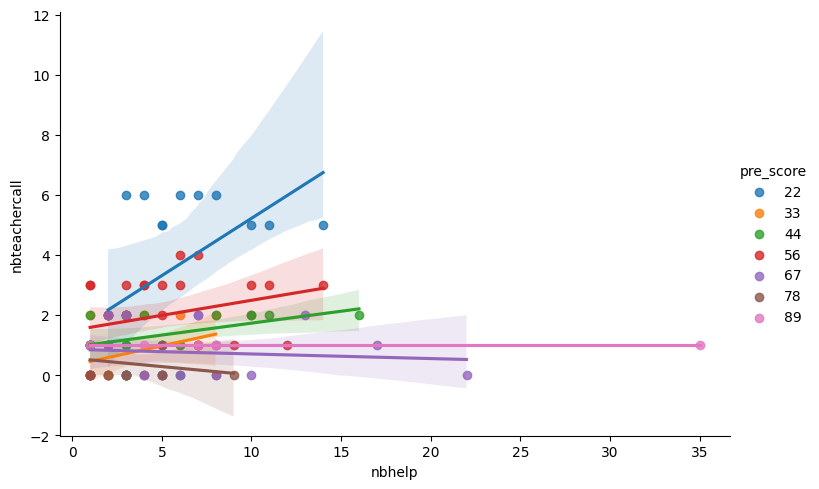

In [150]:
sns.lmplot(x='nbhelp', y='nbteachercall', hue='pre_score', data=students_A_alldata_LAN, aspect=1.5)

In [152]:
calls_per_student_all = pd.concat([
    calls_per_student_A.to_frame(name='nbteachercall').assign(group='A'), 
    calls_per_student_B.to_frame(name='nbteachercall').assign(group='B')
])

print(calls_per_student_all.head())
print("...\n")


MAP_B = LAN_S8+LAN_S10B+CER_B
mappingB = {item["id"]: item["game"] for item in MAP_B}

students_B_scores[STUDENT_DATA_KEY] = students_B_scores[CODE_DATA_KEY].map(mappingB)
students_B_scores[STUDENT_DATA_KEY] = students_B_scores[STUDENT_DATA_KEY].astype(str)

students_all_scores = pd.concat([students_A_scores, students_B_scores])

students_all_scores_teachercalls = pd.merge(students_all_scores, calls_per_student_all, on=STUDENT_DATA_KEY, how='inner')
print(students_all_scores_teachercalls.head())

formula = "nbteachercall ~ group*pre_score"
print(formula)
#model = smf.mixedlm(formula, students_all_scores_teachercalls, groups=students_all_scores_teachercalls["_student"])
model = smf.gls(formula, students_all_scores_teachercalls)
result = model.fit()
print(result.summary())


          nbteachercall group
_student                     
HcN3TGD               3     A
6xExMYw               1     A
5eKc43c               0     A
DMTs6iy               2     A
eHuZtre               1     A
...

   _code  pre_score  post_score  score_diff _student  nbteachercall group
0      1         67          78          11  mqDmUa3              0     A
1      2         67          78          11  GcmQWAa              1     A
2      3         33          22         -11  8hYqYSG              0     A
3      4         56          44         -12  XdF2sz6              0     A
4      5         44          56          12  Rj6mATf              0     A
nbteachercall ~ group*pre_score
                            GLS Regression Results                            
Dep. Variable:          nbteachercall   R-squared:                       0.124
Model:                            GLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                    